# Imports and variables

In [43]:
import pickle
import numpy as np
import os
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from src.results import get_panel_data, get_best_scores_table, get_scores_skills_table, get_final_scores_skills_table

In [53]:
ens_method = "rand_init"
ens_method_ls = [
    "rand_init",
    "bagging",
    "batchensemble",
    "bayesian",
    "mc_dropout",
    "concrete_dropout",
    "variational_dropout",
]
ens_method_labels = {
    "rand_init": "Naive",
    "bagging": "Bagging",
    "batchensemble": "BatchEns.",
    "bayesian": "Bayesian",
    "mc_dropout": "MC Drop.",
    "concrete_dropout": "Conc. Drop.",
    "variational_dropout": "Var. Drop.",
}
dataset_ls = [
    "boston",
    "concrete",
    "energy",
    "kin8nm",
    "naval",
    "power",
    "protein",
    "wine",
    "yacht",
]
dataset_labels = {
    "scen_1": "Scenario 1 \n (N=16,000)",
    "scen_4": "Scenario 2 \n (N=16,000)",
    "boston": "Boston Housing \n (N=506)",
    "concrete": "Concrete Strength \n (N=1,030)",
    "energy": "Energy Efficiency \n (N=768)",
    "kin8nm": "Kin8nm \n (N=8,192)",
    "naval": "Naval Propulsion \n (N=11,934)",
    "power": "Power Plant \n (N=9,568)",
    "protein": "Protein Structure \n (N=45,730)",
    "wine": "Red Wine Quality \n (N=1,599)",
    "yacht": "Yacht\n Hydrodynamics \n (N=308)"
}
agg_labels = {
    "lp": r"$LP$",
    "vi": r"$V_0^=$",
    "vi-a": r"$V_a^=$",
    "vi-w": r"$V_0^w$",
    "vi-aw": r"$V_a^w$",
}

In [45]:
# Get colors
agg_cols = sns.color_palette("Dark2", 8, as_cmap=True)
# Colors of aggregation methods
agg_col = {
    "lp": agg_cols.colors[4],  # type: ignore
    "vi": agg_cols.colors[5],  # type: ignore
    "vi-a": agg_cols.colors[2],  # type: ignore
    "vi-w": agg_cols.colors[0],  # type: ignore
    "vi-aw": agg_cols.colors[3],  # type: ignore
    "ens": agg_cols.colors[7],  # type: ignore
    "opt": agg_cols.colors[1],  # type: ignore
}

greens = sns.color_palette("Greens", 2, as_cmap=False)
blues = sns.color_palette("Blues", 1)
purples = sns.color_palette("Purples", 1)
reds = sns.color_palette("Reds", 3)
ens_col = {
    "rand_init": greens[1], #multi_model_cols.colors[0],  # type: ignore
    "bagging": greens[0], #multi_model_cols.colors[1],  # type: ignore
    "batchensemble": blues[0], #multi_model_cols.colors[3],  # type: ignore
    "bayesian": purples[0], #multi_model_cols.colors[8],  # type: ignore
    "mc_dropout": reds[2], #dropout_cols.colors[14],  # type: ignore
    "variational_dropout": reds[1], #dropout_cols.colors[16],  # type: ignore
    "concrete_dropout": reds[0], #dropout_cols.colors[15],  # type: ignore
}

# KIT colors
kit_cols_dict = {
    "green": "#00876C",
    "blue": "#4664AA",
    "black": "#000000",
    "grey": "#404040",
}

In [46]:
score_vec = ["crps", "crpss", "me", "lgt", "cov", "a", "w"]
nn_vec = ["drn", "bqn"]
n_ens_vec = np.arange(start=2, stop=20 + 2, step=2)
agg_meths = ["lp", "vi", "vi-a", "vi-w", "vi-aw"]

In [47]:
export = True
save_dir = os.path.join("plots", "results")

# Get score and skill data

In [18]:
drn_choice = {
    "scen_1": "norm",
    "scen_4": "norm",
    'boston': '0tnorm',
    'concrete': '0tnorm',
    'energy': '0tnorm',
    'kin8nm': '0tnorm',
    'naval': '0tnorm',
    'power': 'norm',
    'protein': 'norm',
    'wine': 'tnorm',
    'yacht': '0tnorm',
}

bqn_choice = {
    "scen_1": "norm",
    "scen_4": "norm",
    'boston': '0tnorm',
    'concrete': '0tnorm',
    'energy': '0tnorm',
    'kin8nm': '0tnorm',
    'naval': '0tnorm',
    'power': 'norm',
    'protein': 'norm',
    'wine': 'tnorm',
    'yacht': '0tnorm',
}

paths = {
    "norm": os.path.join("..", "..", "04_Experiments", "Normal_final"),
    "tnorm": os.path.join("..", "..", "04_Experiments", "t_Normal_final"),
    "0tnorm": os.path.join("..", "..", "04_Experiments", "0t_Normal_final"),    
}

df_scores, df_skills = get_final_scores_skills_table(paths = paths, drn_choice=drn_choice, bqn_choice=bqn_choice, dataset_ls=dataset_ls, ens_method_ls=ens_method_ls)

In [48]:
df_scores.head()

ens_method dataset   nn    agg   score_2   score_4   score_6   score_8  \
0  rand_init   power  drn     lp  2.411491  3.270739  2.791900  2.621768   
1  rand_init   power  drn     vi  2.408718  5.643838  4.484849  3.905257   
2  rand_init   power  drn   vi-a  2.409180  2.495805  2.449968  2.431225   
3  rand_init   power  drn   vi-w  2.409311  2.499149  2.447617  2.429227   
4  rand_init   power  drn  vi-aw  2.408623  2.499341  2.446256  2.428961   

   score_10  score_12  score_14  score_16  score_18  score_20  avg_score distr  
0  3.004495  2.826879  2.804209  2.792799  2.761485  2.697627   2.798339  norm  
1  7.469828  6.470609  6.776216  7.134706  7.168481  6.539488   5.800199  norm  
2  2.517192  2.485035  2.471313  2.460534  2.452858  2.444547   2.461766  norm  
3  2.500029  2.472818  2.457794  2.446735  2.440557  2.434578   2.453782  norm  
4  2.484159  2.464905  2.450544  2.441520  2.436044  2.431272   2.449162  norm

In [49]:
# Define plot variables
show_outliers = False

In [54]:
dataset_ls.insert(0, "scen_4")
dataset_ls.insert(0, "scen_1")

In [51]:
dataset_ls

['scen_1',
 'scen_4',
 'boston',
 'concrete',
 'energy',
 'kin8nm',
 'naval',
 'power',
 'protein',
 'wine',
 'yacht']

# Final plots

## Boxplot - Skill for increasing ensemble size per aggregation method

- Columns: NN type (DRN, BQN)
- Rows: Datasets

Aggregated over:
- Ensemble methods

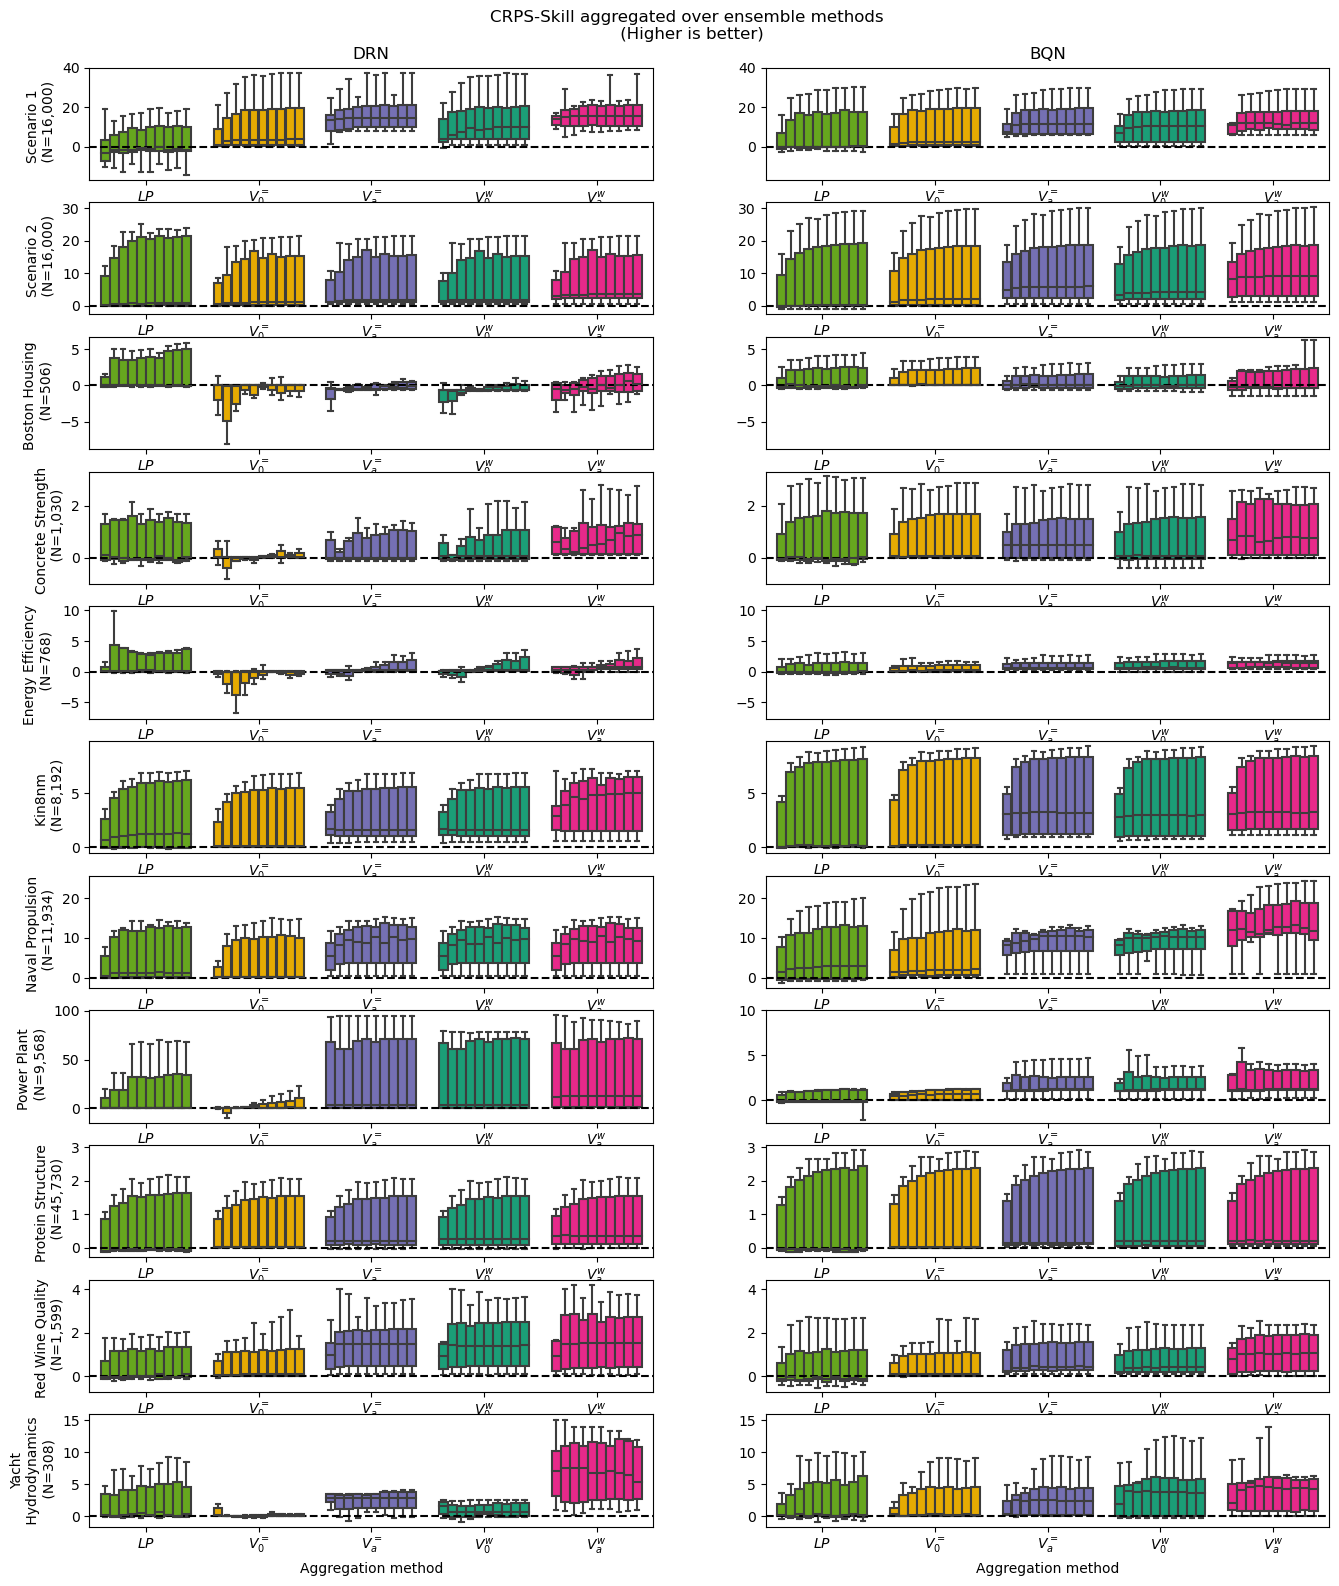

In [55]:
##### Skill - Boxplots - x=aggregation_methods #####


# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(16,16*1.2), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_skills[df_skills["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="skill")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"skill_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.boxplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="skill", x="agg", hue="ensemble_size", showfliers=show_outliers)
        
        # Add 0 line
        g.axhline(0, linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_nn].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([agg_labels.get(agg) for agg in agg_meths])
        axs[i_dataset][i_nn].set_xlabel("")
        axs[len(dataset_ls)-1][i_nn].set_xlabel("Aggregation method")

        # Change color
        boxplots = axs[i_dataset][i_nn].patches
        agg_col_ls = list(agg_col.values())[:5]
        boxes = axs[i_dataset][i_nn].findobj(matplotlib.patches.PathPatch)  # type: ignore
        for i, box in enumerate(boxes):
            box.set_facecolor(agg_col_ls[i//10])

# # Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)
handles, labels = axs[0][0].get_legend_handles_labels()

# Set y axis range
for idx, (ax_drn, ax_bqn) in enumerate(axs):
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    
    # Adjust axis for BQN Power
    if idx == 7:
        ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
        ax_bqn.set_ylim(-2.5, 10)

# Set titles and legends
axs[0][0].set_title("DRN")
axs[0][1].set_title("BQN")
fig.subplots_adjust(top=0.87)
fig.suptitle(f"CRPS-Skill aggregated over ensemble methods \n (Higher is better)", y=0.9)

# Save figure
if export:
    if show_outliers:
        filename=os.path.join(save_dir, "01_skill_boxplot_per_agg.pdf")
        fig.savefig(filename, bbox_inches='tight')
        filename=os.path.join(save_dir, "01_skill_boxplot_per_agg.png")
        fig.savefig(filename, bbox_inches='tight')
    else:
        filename=os.path.join(save_dir, "01_skill_boxplot_per_agg_no_outliers.pdf")
        fig.savefig(filename, bbox_inches='tight')
        filename=os.path.join(save_dir, "01_skill_boxplot_per_agg_no_outliers.png")
        fig.savefig(filename, bbox_inches='tight')

## Lineplot - Skill per aggregation and ensemble method

- Columns: Ensemble method
- Rows: Dataset

Aggregated over:

- None

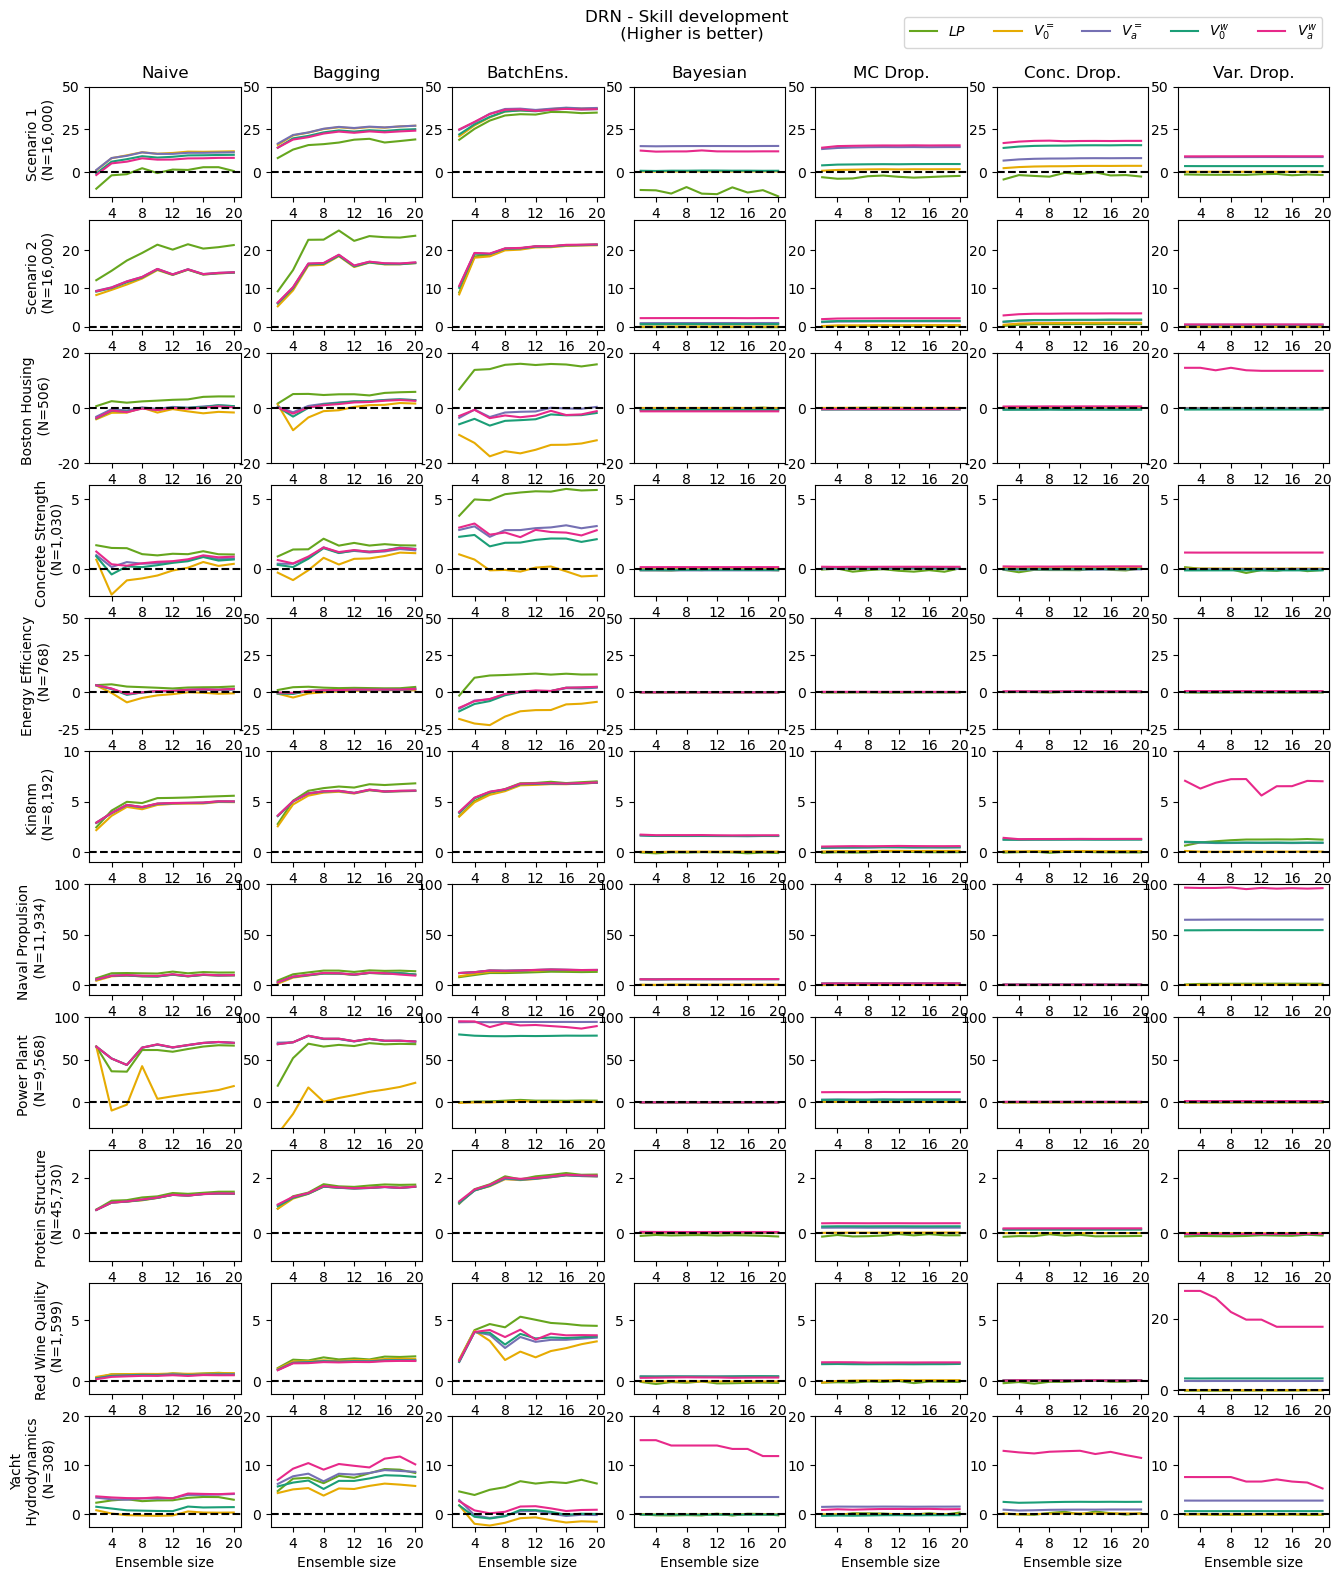

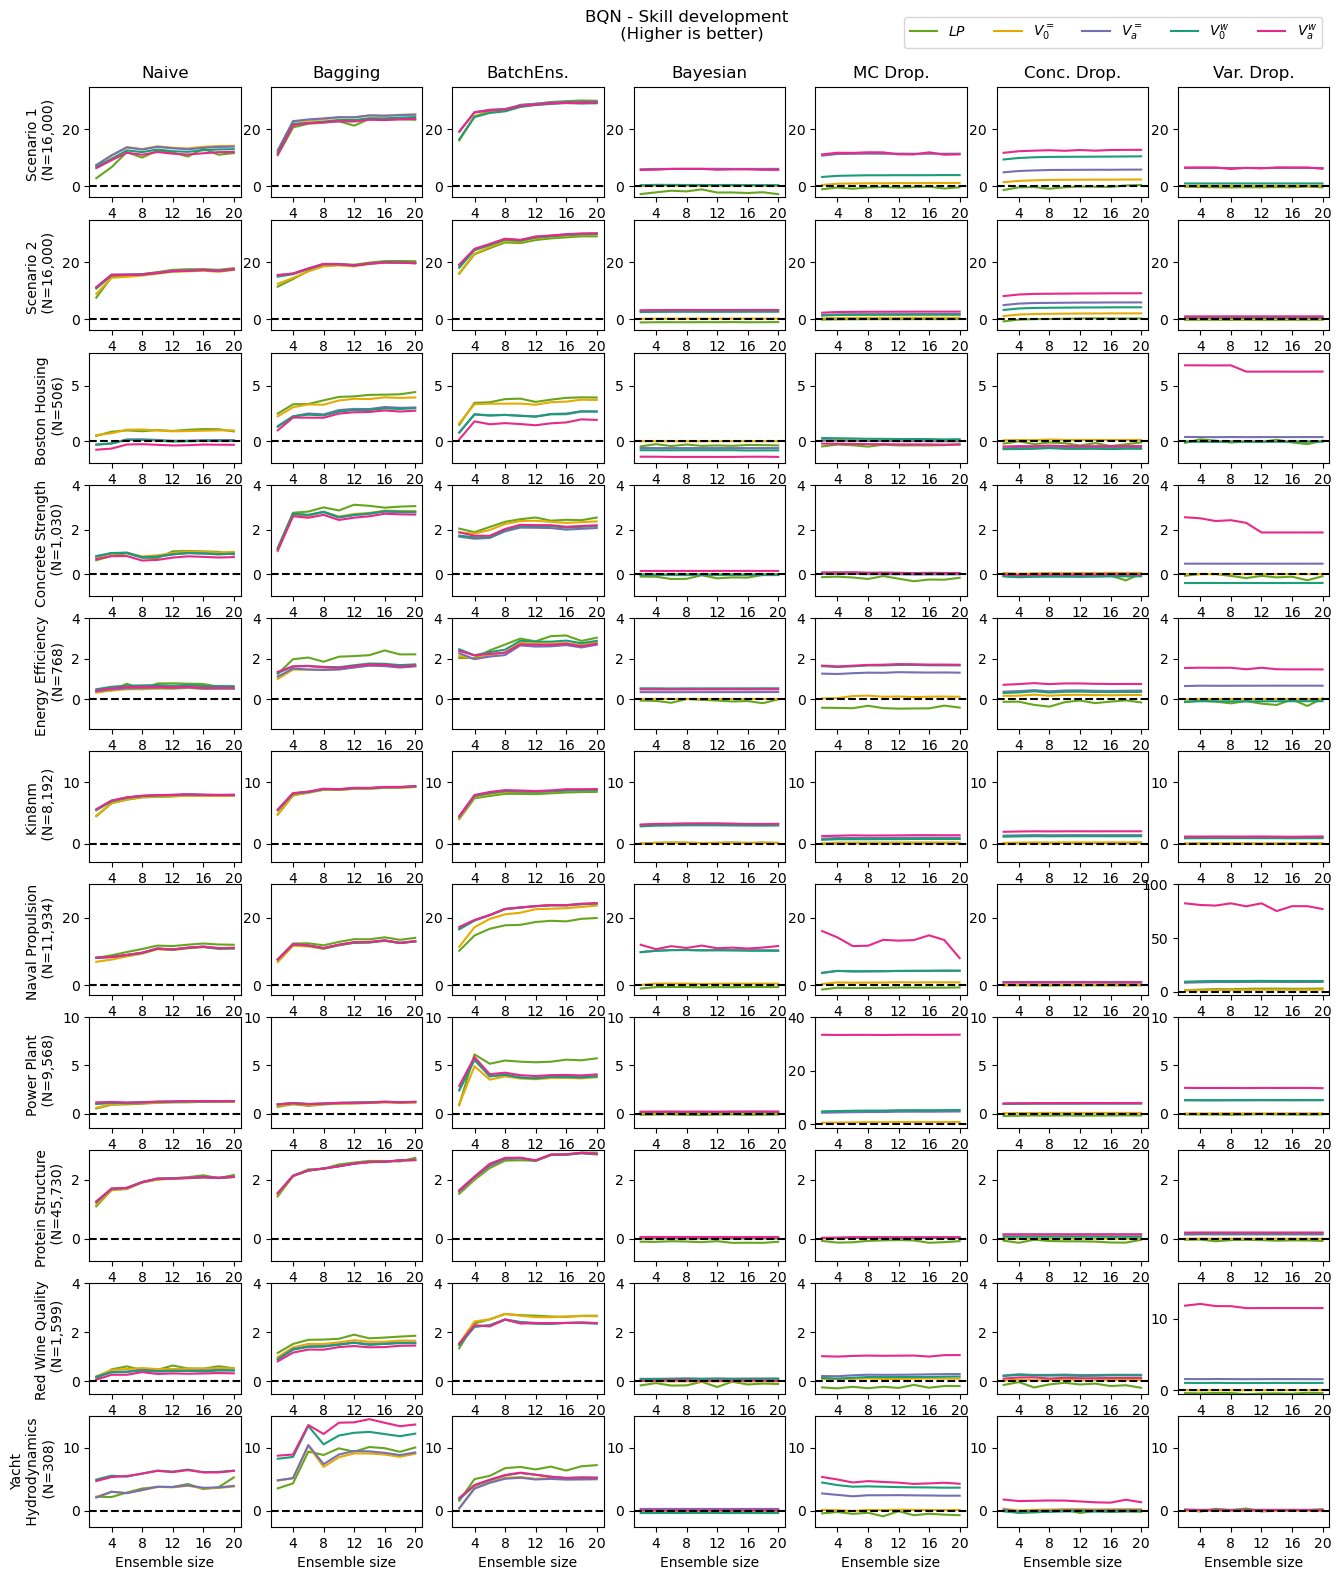

In [56]:
##### Skill - Lineplot - x=ensemble_size - Columns=ensemble_method #####

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    # Create subplots
    fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(ens_method_ls), figsize=(16,16*1.2), squeeze=False)
    df_nn = df_skills[df_skills["nn"] == nn]
    for i_ens, ens_method in enumerate(ens_method_ls):
        df_nn_ens = df_nn[(df_nn["ens_method"] == ens_method)]
        for i_dataset, dataset in enumerate(dataset_ls):
            df_nn_dataset = df_nn_ens[(df_nn_ens["dataset"] == dataset)]
            
            # Melt dataframe for sns plots
            df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="skill")
            # Only use skills not differences
            df_final = df_melt[df_melt["ensemble_size"].isin([f"skill_{n_ens}" for n_ens in n_ens_vec])]
                
            # Plot boxplots
            g = sns.lineplot(ax=axs[i_dataset][i_ens], data=df_final,
                    y="skill", x="ensemble_size", hue="agg", palette=agg_col)
            
            # Add 0 line
            g.axhline(0, linestyle="--", color=kit_cols_dict["black"])
            # Add labels to x and y axis
            axs[i_dataset][i_ens].set_ylabel("")
            axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
            axs[i_dataset][i_ens].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
            with_ticks = True
            if with_ticks:
                start, end = ax.get_xlim()
                # axs[i_dataset][i_ens].xaxis.set_ticks(list(np.arange(start, end, 4)))
                axs[i_dataset][i_ens].set_xticks([1, 3, 5, 7, 9])
                axs[i_dataset][i_ens].set_xticklabels(["4", "8", "12", "16", "20"])
            else:
                if i_ens != 0:
                    axs[i_dataset][i_ens].tick_params(axis="both", which="both", left=False, labelleft=False)
                    # axs[i_dataset][i_ens].set_yticklabels("")
                if i_dataset != len(dataset_ls) - 1:
                    # axs[i_dataset][i_ens].set_xticklabels("")
                    axs[i_dataset][i_ens].tick_params(axis="both", which="both", bottom=False, labelbottom=False)
                else:
                    axs[i_dataset][i_ens].set_xticklabels([str(i_ens) for i_ens in n_ens_vec])
            axs[i_dataset][i_ens].set_xlabel("")
        axs[len(dataset_ls)-1][i_ens].set_xlabel("Ensemble size")

    # Remove subplot legends and add figure legend
    for ax in [item for sublist in axs for item in sublist]:
        ax.legend([],[], frameon=False)

    # Merge subplot legends and displaz figure legend
    handles = []
    labels = []
    for ax in [item for sublist in axs for item in sublist]:
        curr_handles, curr_labels = ax.get_legend_handles_labels()
        for idx, check_label in enumerate(curr_labels):
            if check_label not in labels:
                handles.append(curr_handles[idx])
                labels.append(curr_labels[idx])
        ax.legend([],[], frameon=False)
    labels = [agg_labels.get(agg) for agg in labels]
    fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.9), ncol=len(agg_meths))

    # # Set y axis range
    limits = {
        "drn": {
            "scen_1": [-15, 50],
            "scen_4": [-1, 28],
            "boston": [-20, 20],
            "concrete": [-2, 6],
            "energy": [-25, 50],
            "kin8nm": [-1, 10],
            "naval": [-10, 100],
            "power": [-30, 100],
            "protein": [-1, 3],
            "wine": [-1, 8],
            "yacht": [-2.5, 20],
        },
        "bqn": {
            "scen_1": [-4, 35],
            "scen_4": [-4, 35],
            "boston": [-2, 8],
            "concrete": [-1, 4],
            "energy": [-1.5, 4],
            "kin8nm": [-3, 15],
            "naval": [-3, 30],
            "power": [-1.5, 10],
            "protein": [-0.75, 3],
            "wine": [-0.5, 4],
            "yacht": [-2.5, 15],
        }
    }
    limits_var_dropout = {
        "drn": {
            "scen_1": [-15, 50],
            "scen_4": [-1, 28],
            "boston": [-20, 20],
            "concrete": [-2, 6],
            "energy": [-25, 50],
            "kin8nm": [-1, 10],
            "naval": [-10, 100],
            "power": [-30, 100],
            "protein": [-1, 3],
            "wine": [-1, 30],
            "yacht": [-2.5, 20],
        },
        "bqn": {
            "scen_1": [-4, 35],
            "scen_4": [-4, 35],
            "boston": [-2, 8],
            "concrete": [-1, 4],
            "energy": [-1.5, 4],
            "kin8nm": [-3, 15],
            "naval": [-3, 100],
            "power": [-1.5, 10],
            "protein": [-0.75, 3],
            "wine": [-0.5, 15],
            "yacht": [-2.5, 15],
        }
    }
    for idx, ax_i_ens in enumerate(axs):       
        for jdx, ax in enumerate(ax_i_ens):
            hard_cut_l, hard_cut_u = list(limits[nn].values())[idx]
            if (nn == "bqn") & (jdx == 4) & (idx == 7):  # BQN, MC Dropout, Power
                hard_cut_l = -1.5
                hard_cut_u = 40
            if jdx == 6:
                hard_cut_l, hard_cut_u = list(limits_var_dropout[nn].values())[idx]
            ax.set_ylim(hard_cut_l, hard_cut_u)

    # Set titles and legends
    for i_ens, ens_method in enumerate(ens_method_ls):
        axs[0][i_ens].set_title(ens_method_labels[ens_method])
    fig.subplots_adjust(top=0.86)
    fig.suptitle(f"{nn.upper()} - Skill development \n (Higher is better)", y=0.9)


    # Save figure
    if export:
        filename=os.path.join(save_dir, f"01_skill_lineplot_{nn}.pdf")
        fig.savefig(filename, bbox_inches='tight')
        filename=os.path.join(save_dir, f"01_skill_lineplot_{nn}.png")
        fig.savefig(filename, bbox_inches='tight')

## Barplot - Skill change (min vs. max ensemble size) per ensemble and aggregation method

- Columns: NN type (DRN, BQN)
- Rows: Datasets

Aggregated over:

- Ensemble size &rarr; (max - min)

In [57]:
# Add change to skills table
df_skills["change"] = df_skills["skill_20"] - df_skills["skill_2"]

In [58]:
df_skills[(df_skills["dataset"] == "scen_1") & (df_skills["ens_method"] == "batchensemble")]

ens_method dataset   nn    agg    skill_2    skill_4    skill_6  \
50   batchensemble  scen_1  drn     lp  18.855709  25.267138  30.135274   
51   batchensemble  scen_1  drn     vi  20.929439  27.303114  31.990283   
52   batchensemble  scen_1  drn   vi-a  24.643502  29.179831  34.140075   
53   batchensemble  scen_1  drn   vi-w  22.007331  27.912199  32.286856   
54   batchensemble  scen_1  drn  vi-aw  24.960454  29.357540  33.950892   
435  batchensemble  scen_1  bqn     lp  16.074372  24.628140  26.363977   
436  batchensemble  scen_1  bqn     vi  16.276367  24.506568  26.011700   
437  batchensemble  scen_1  bqn   vi-a  19.183180  26.084808  26.910755   
438  batchensemble  scen_1  bqn   vi-w  16.435033  24.319458  25.778127   
439  batchensemble  scen_1  bqn  vi-aw  19.147987  25.919624  26.636215   

       skill_8   skill_10   skill_12   skill_14   skill_16   skill_18  \
50   33.122721  33.874144  33.651654  35.193513  35.098551  34.492780   
51   35.417539  36.145804  35.874010  36.857862  37.536670  37.110521   
52   36.943006  37.142204  36.373719  37.099620  37.701153  37.292242   
53   35.503518  36.064287  35.606163  36.460250  37.156638  36.688872   
54   36.477062  36.661788  35.789032  36.429814  37.009762  36.643069   
435  26.528380  28.639622  28.939096  29.608564  29.914887  30.150091   
436  26.531985  28.117352  28.834212  29.233260  29.535727  29.421618   
437  27.154417  28.482618  29.026032  29.454599  29.624144  29.598582   
438  26.332356  27.868687  28.542601  28.941622  29.235858  29.086170   
439  27.033061  28.248774  28.704799  29.141638  29.321901  29.258164   

      skill_20  avg_skill distr     change  
50   34.811554  31.450304  norm  15.955844  
51   37.334957  33.650020  norm  16.405518  
52   37.539524  34.805487  norm  12.896022  
53   36.866682  33.655280  norm  14.859350  
54   36.840808  34.412022  norm  11.880354  
435  30.037161  27.088429  norm  13.962789  
436  29.544616  26.801341  norm  13.268249  
437  29.739579  27.525871  norm  10.556399  
438  29.173230  26.571314  norm  12.738197  
439  29.452202  27.286437  norm  10.304215

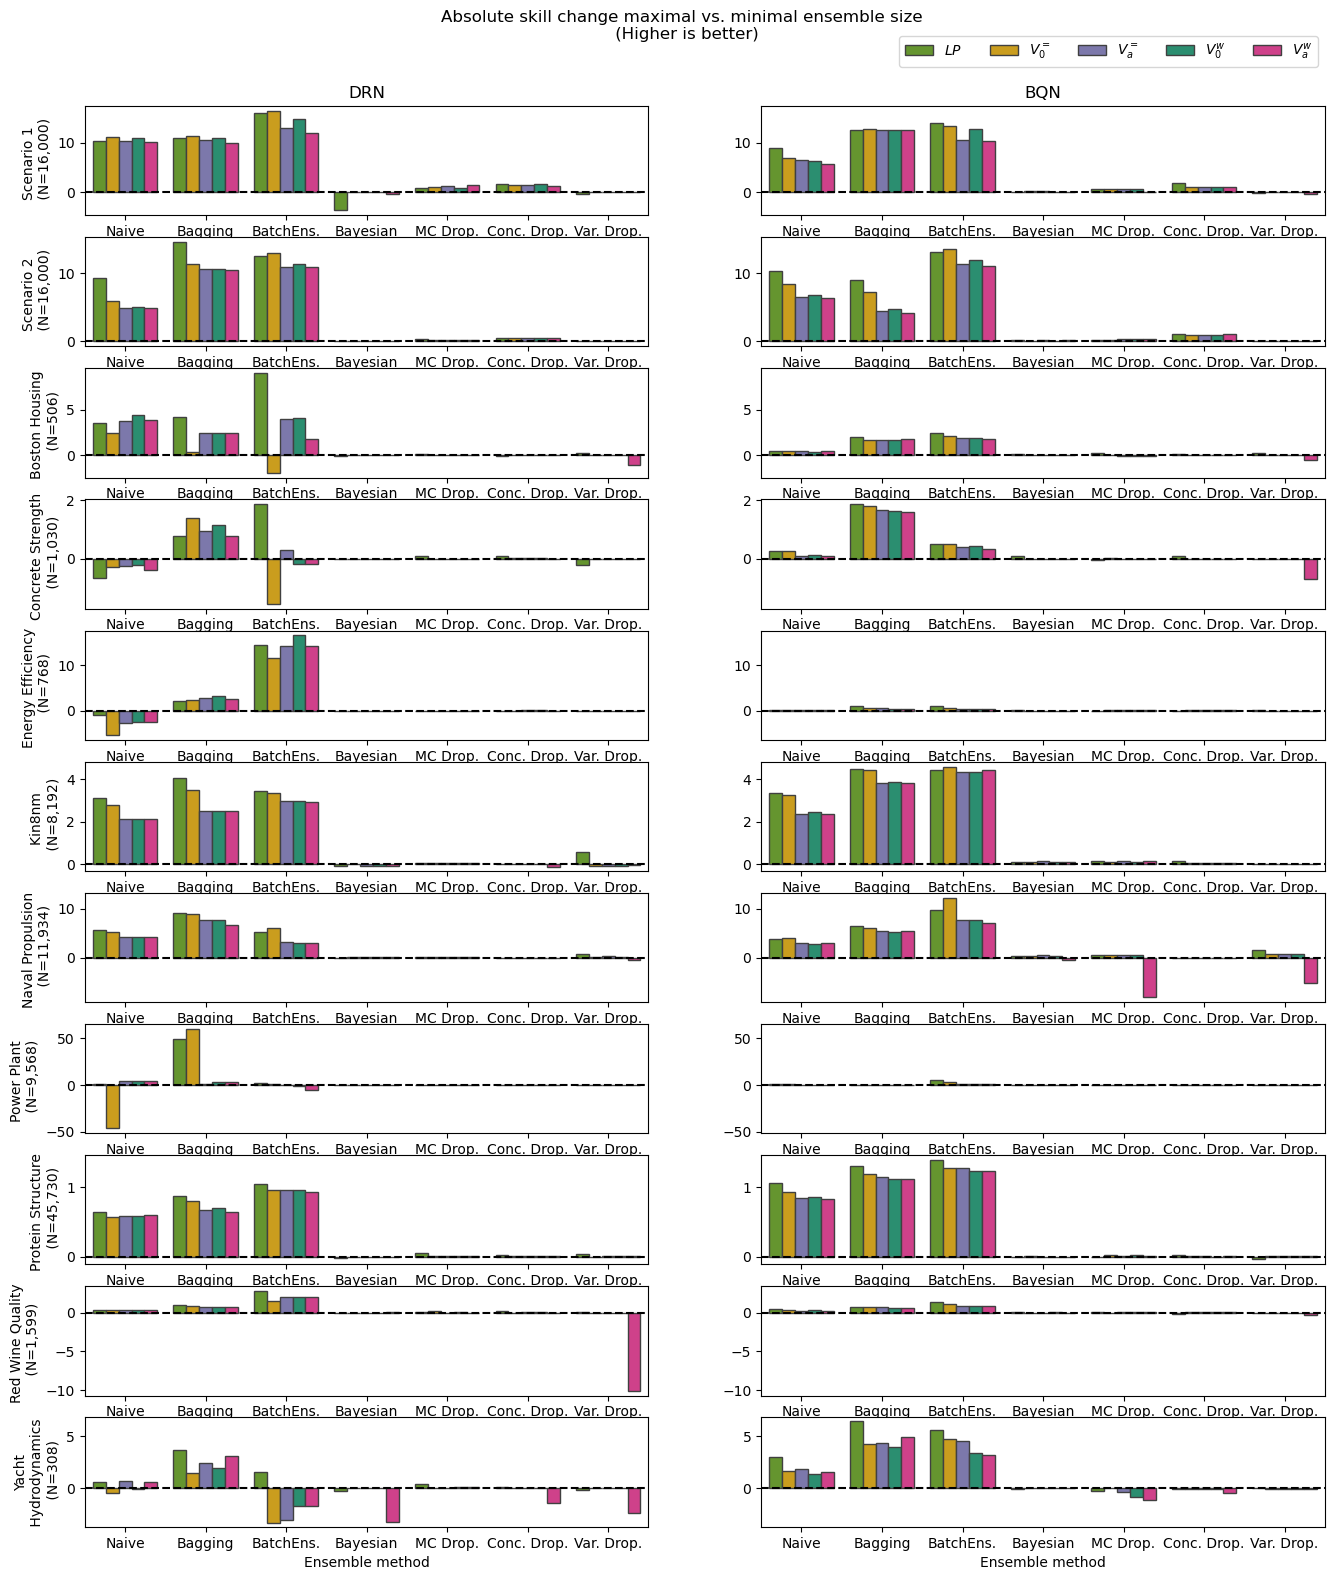

In [59]:
##### Skill - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(16,16*1.2), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_skills[df_skills["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        
        # Plot boxplots
        g = sns.barplot(ax=axs[i_dataset][i_nn], data=df_nn_dataset,
                 y="change", x="ens_method", hue="agg", palette=agg_col, edgecolor=kit_cols_dict["grey"], order=ens_method_ls)
        
        # Add 0 line
        g.axhline(0, linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_nn].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
        axs[i_dataset][i_nn].set_xlabel("")
        axs[len(dataset_ls)-1][i_nn].set_xlabel("Ensemble method")

# Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
labels = [agg_labels.get(agg) for agg in labels]
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.89), ncol=len(agg_meths))

# Set y axis range
# limits = {
#     "boston": [-100, 400],
#     "concrete": [-200,500],
#     "energy": [-50, 400],
#     "kin8nm": [0, 200],
#     "naval": [0, 200],
#     "power": [-100, 200],
#     "protein": [0, 250],
#     "wine": [-50, 300],
#     "yacht": [-100 , 500],
# }
for idx, (ax_drn, ax_bqn) in enumerate(axs):
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    
    # hard_cut_l, hard_cut_u = list(limits.values())[idx]
    # ax_drn.set_ylim(max(hard_cut_l, min(drn_l, bqn_l)), min(hard_cut_u, max(drn_u, bqn_u)))
    # ax_bqn.set_ylim(max(hard_cut_l, min(drn_l, bqn_l)), min(hard_cut_u, max(drn_u, bqn_u)))

# Set titles and legends
axs[0][0].set_title("DRN")
axs[0][1].set_title("BQN")
fig.subplots_adjust(top=0.85)
fig.suptitle(f"Absolute skill change maximal vs. minimal ensemble size \n (Higher is better)", y=0.9)


# Save figure
if export:
    filename=os.path.join(save_dir, "01_skill_barplot_change.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "01_skill_barplot_change.png")
    fig.savefig(filename, bbox_inches='tight')

In [40]:
df_skills[(df_skills["nn"] == "drn") & (df_skills["dataset"] == "wine") & (df_skills["ens_method"] == "variational_dropout")]

ens_method dataset   nn    agg    skill_2    skill_4    skill_6  \
195  variational_dropout    wine  drn     lp  -0.116687  -0.119409  -0.146114   
196  variational_dropout    wine  drn     vi   0.000605   0.005805   0.014207   
197  variational_dropout    wine  drn   vi-a   2.591981   2.571756   2.585050   
198  variational_dropout    wine  drn   vi-w   3.304085   3.281121   3.297601   
199  variational_dropout    wine  drn  vi-aw  27.794108  27.791347  25.811937   

       skill_8   skill_10   skill_12   skill_14   skill_16   skill_18  \
195  -0.066257  -0.102445  -0.069916  -0.075855  -0.081123  -0.032940   
196   0.000433   0.004670   0.006738  -0.003923   0.005467   0.002225   
197   2.578545   2.582058   2.585677   2.576990   2.583204   2.584900   
198   3.296562   3.296773   3.299811   3.291819   3.296421   3.299034   
199  21.895090  19.749586  19.754700  17.751139  17.754306  17.755609   

      skill_20  avg_skill  distr     change  
195  -0.015413  -0.082616  tnorm   0.101274  
196   0.003099   0.003933  tnorm   0.002494  
197   2.587907   2.582807  tnorm  -0.004073  
198   3.301673   3.296490  tnorm  -0.002412  
199  17.756385  21.381421  tnorm -10.037723

# Archive

In [ ]:
##### Skill - Boxplots - x=ensemble_size #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(18,18*1.4), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_skills[df_skills["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="skill")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"skill_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.boxplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="skill", x="ensemble_size", hue="agg", showfliers=show_outliers, palette=agg_col)
        
        # Add 0 line
        g.axhline(0, linestyle="--", color=kit_cols_dict["blue"])
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])

# Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)
handles, labels = axs[0][0].get_legend_handles_labels()
labels = [agg_labels.get(agg) for agg in labels]

# Set y axis range
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.subplots_adjust(top=0.85)
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.88), ncol=len(labels))
fig.suptitle(f"Skill aggregated over ensemble methods", y=0.9)

# Save figure
if export:
    if show_outliers:
        filename=os.path.join(save_dir, "01_skill_boxplot.pdf")
        fig.savefig(filename, bbox_inches='tight')
        filename=os.path.join(save_dir, "01_skill_boxplot.png")
        fig.savefig(filename, bbox_inches='tight')
    else:
        filename=os.path.join(save_dir, "01_skill_boxplot_no_outliers.pdf")
        fig.savefig(filename, bbox_inches='tight')
        filename=os.path.join(save_dir, "01_skill_boxplot_no_outliers.png")
        fig.savefig(filename, bbox_inches='tight')

## Lineplot - Top k skill for increasing ensemble size

- Columns: NN type (DRN, BQN)
- Rows: Datasets

Filtered for:

- Aggregation method (here: LP)

In [10]:
# Define filters
agg_method_to_plot = "lp"
top_k = 5
top_k_score = "avg_skill"

Text(0.5, 0.98, 'Aggregation method LP, show only Top 5')

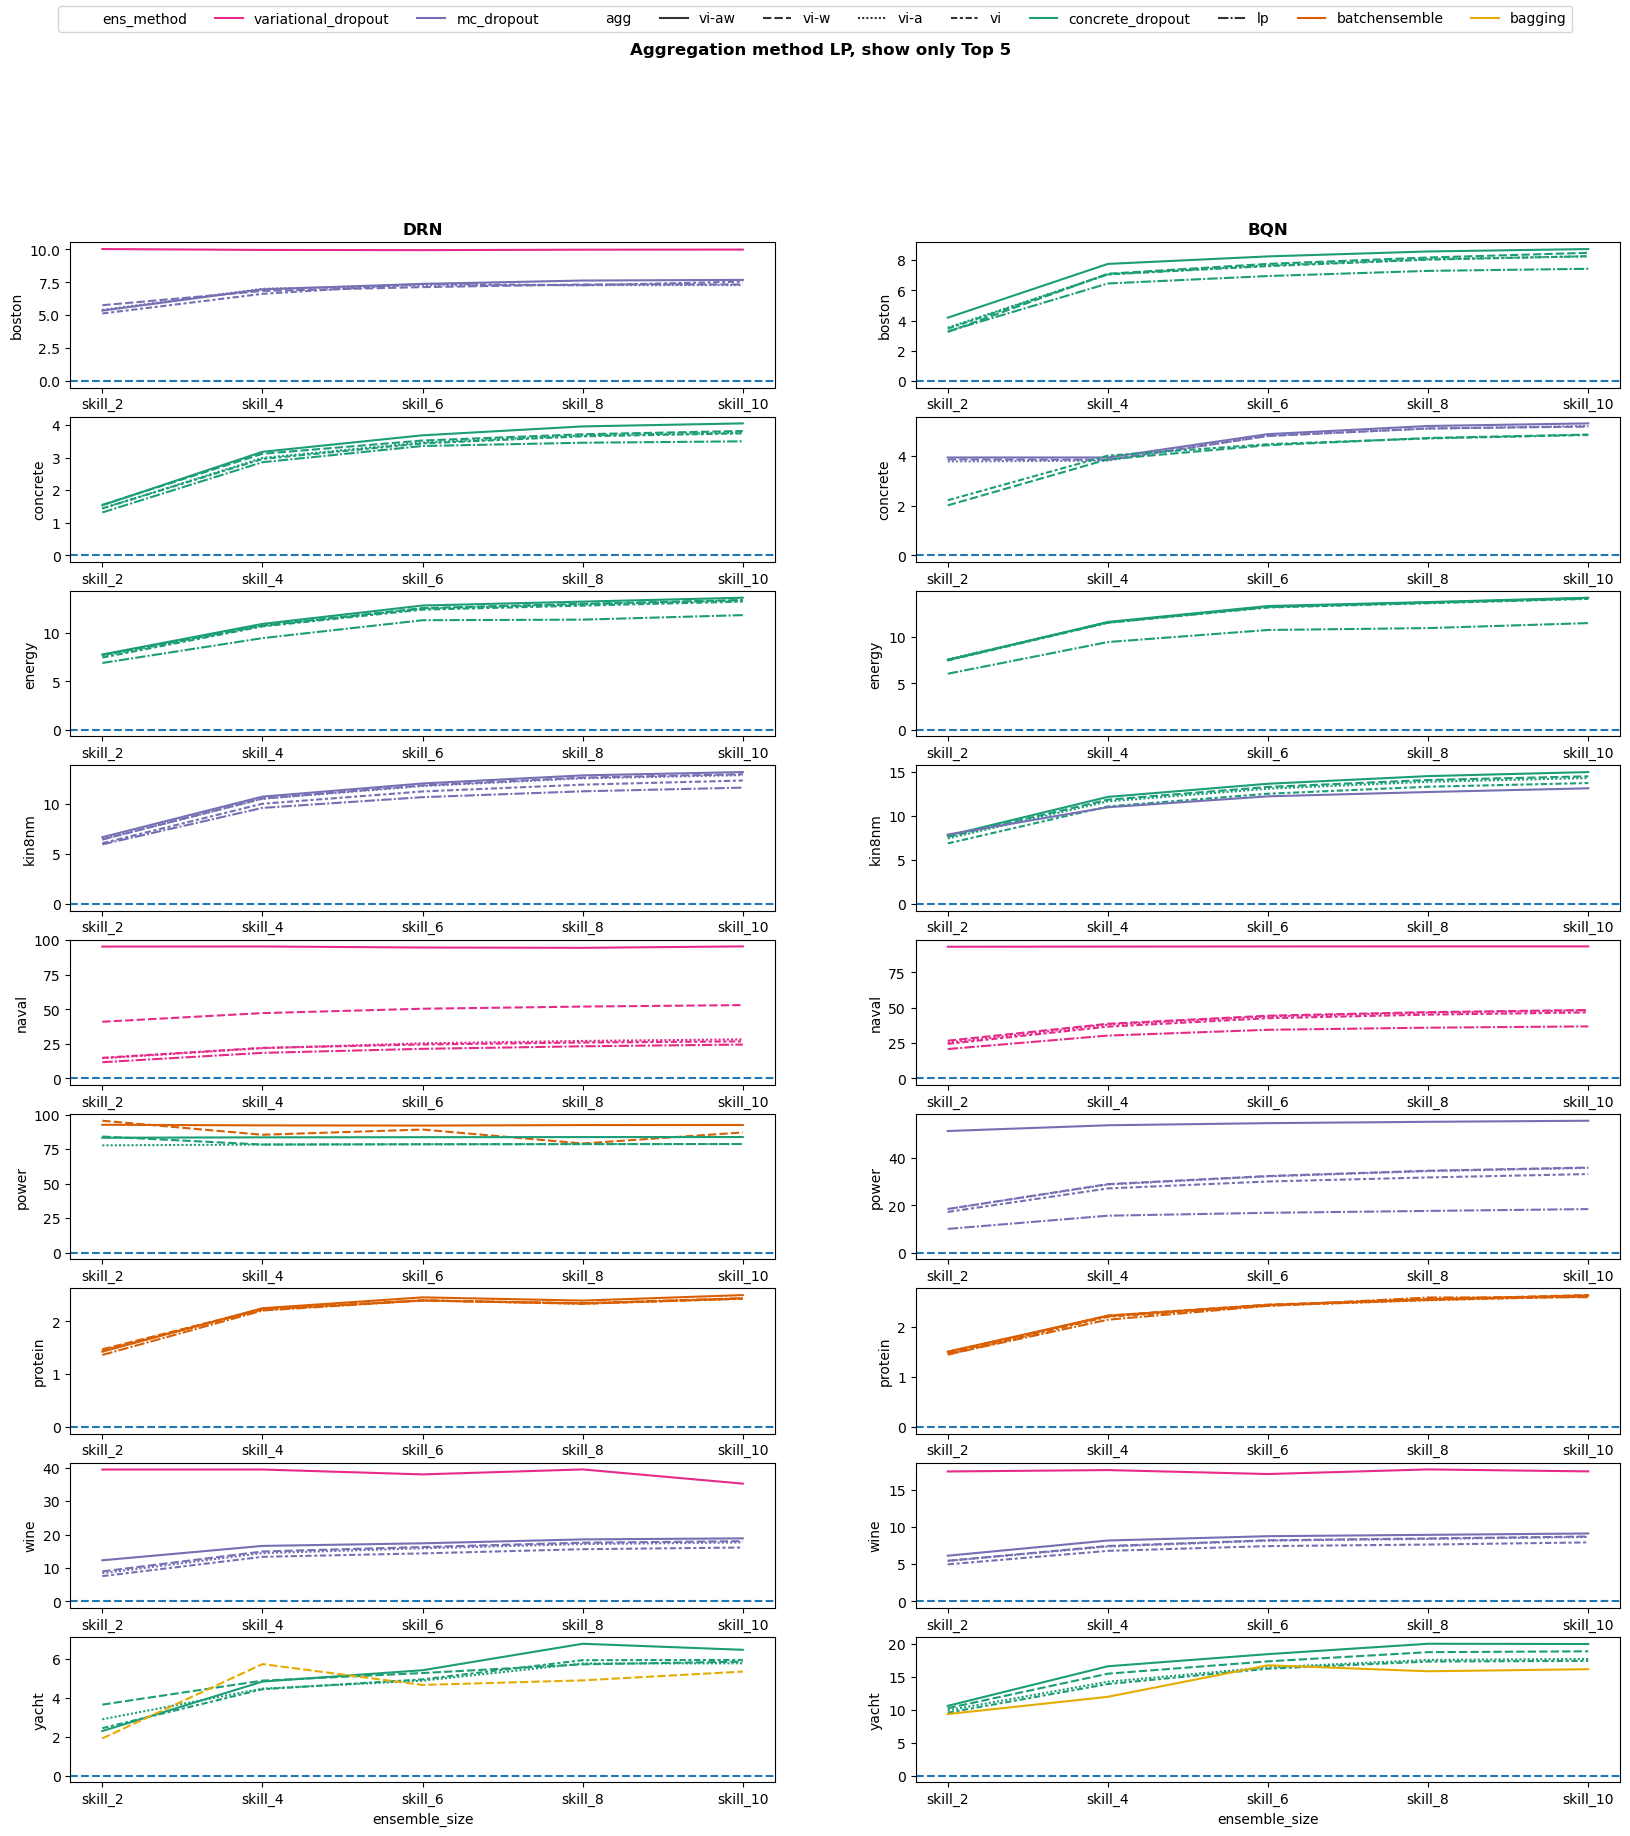

In [11]:
##### Skill - Lineplots - x=ensemble_size #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Filter for specific aggregation method
df_agg = df_skills[df_skills["agg"] == agg_method_to_plot]
# Sort and select best k results
df_agg_top = df_skills.sort_values(["dataset", "nn", top_k_score], ascending=False).groupby(["dataset", "nn"]).head(top_k)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_agg_top[df_agg_top["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="skill")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"skill_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.lineplot(data=df_final, x="ensemble_size", y="skill", hue="ens_method", style="agg", ax=axs[i_dataset][i_nn], palette=ens_col)
        
        # Add 0 line
        g.axhline(0, linestyle="--")
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset)

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.legend(handles, labels, loc='upper center', ncol=len(labels))
fig.suptitle(f"Aggregation method {agg_method_to_plot.upper()}, show only Top {top_k}", fontweight="bold")

## Lineplot - Median / Mean skill per aggregation method

- Columns: NN type (DRN, BQN)
- Rows: Datasets

Aggregated over:

- Ensemble method by `aggregation`

In [29]:
aggregation = "median"
errors = None

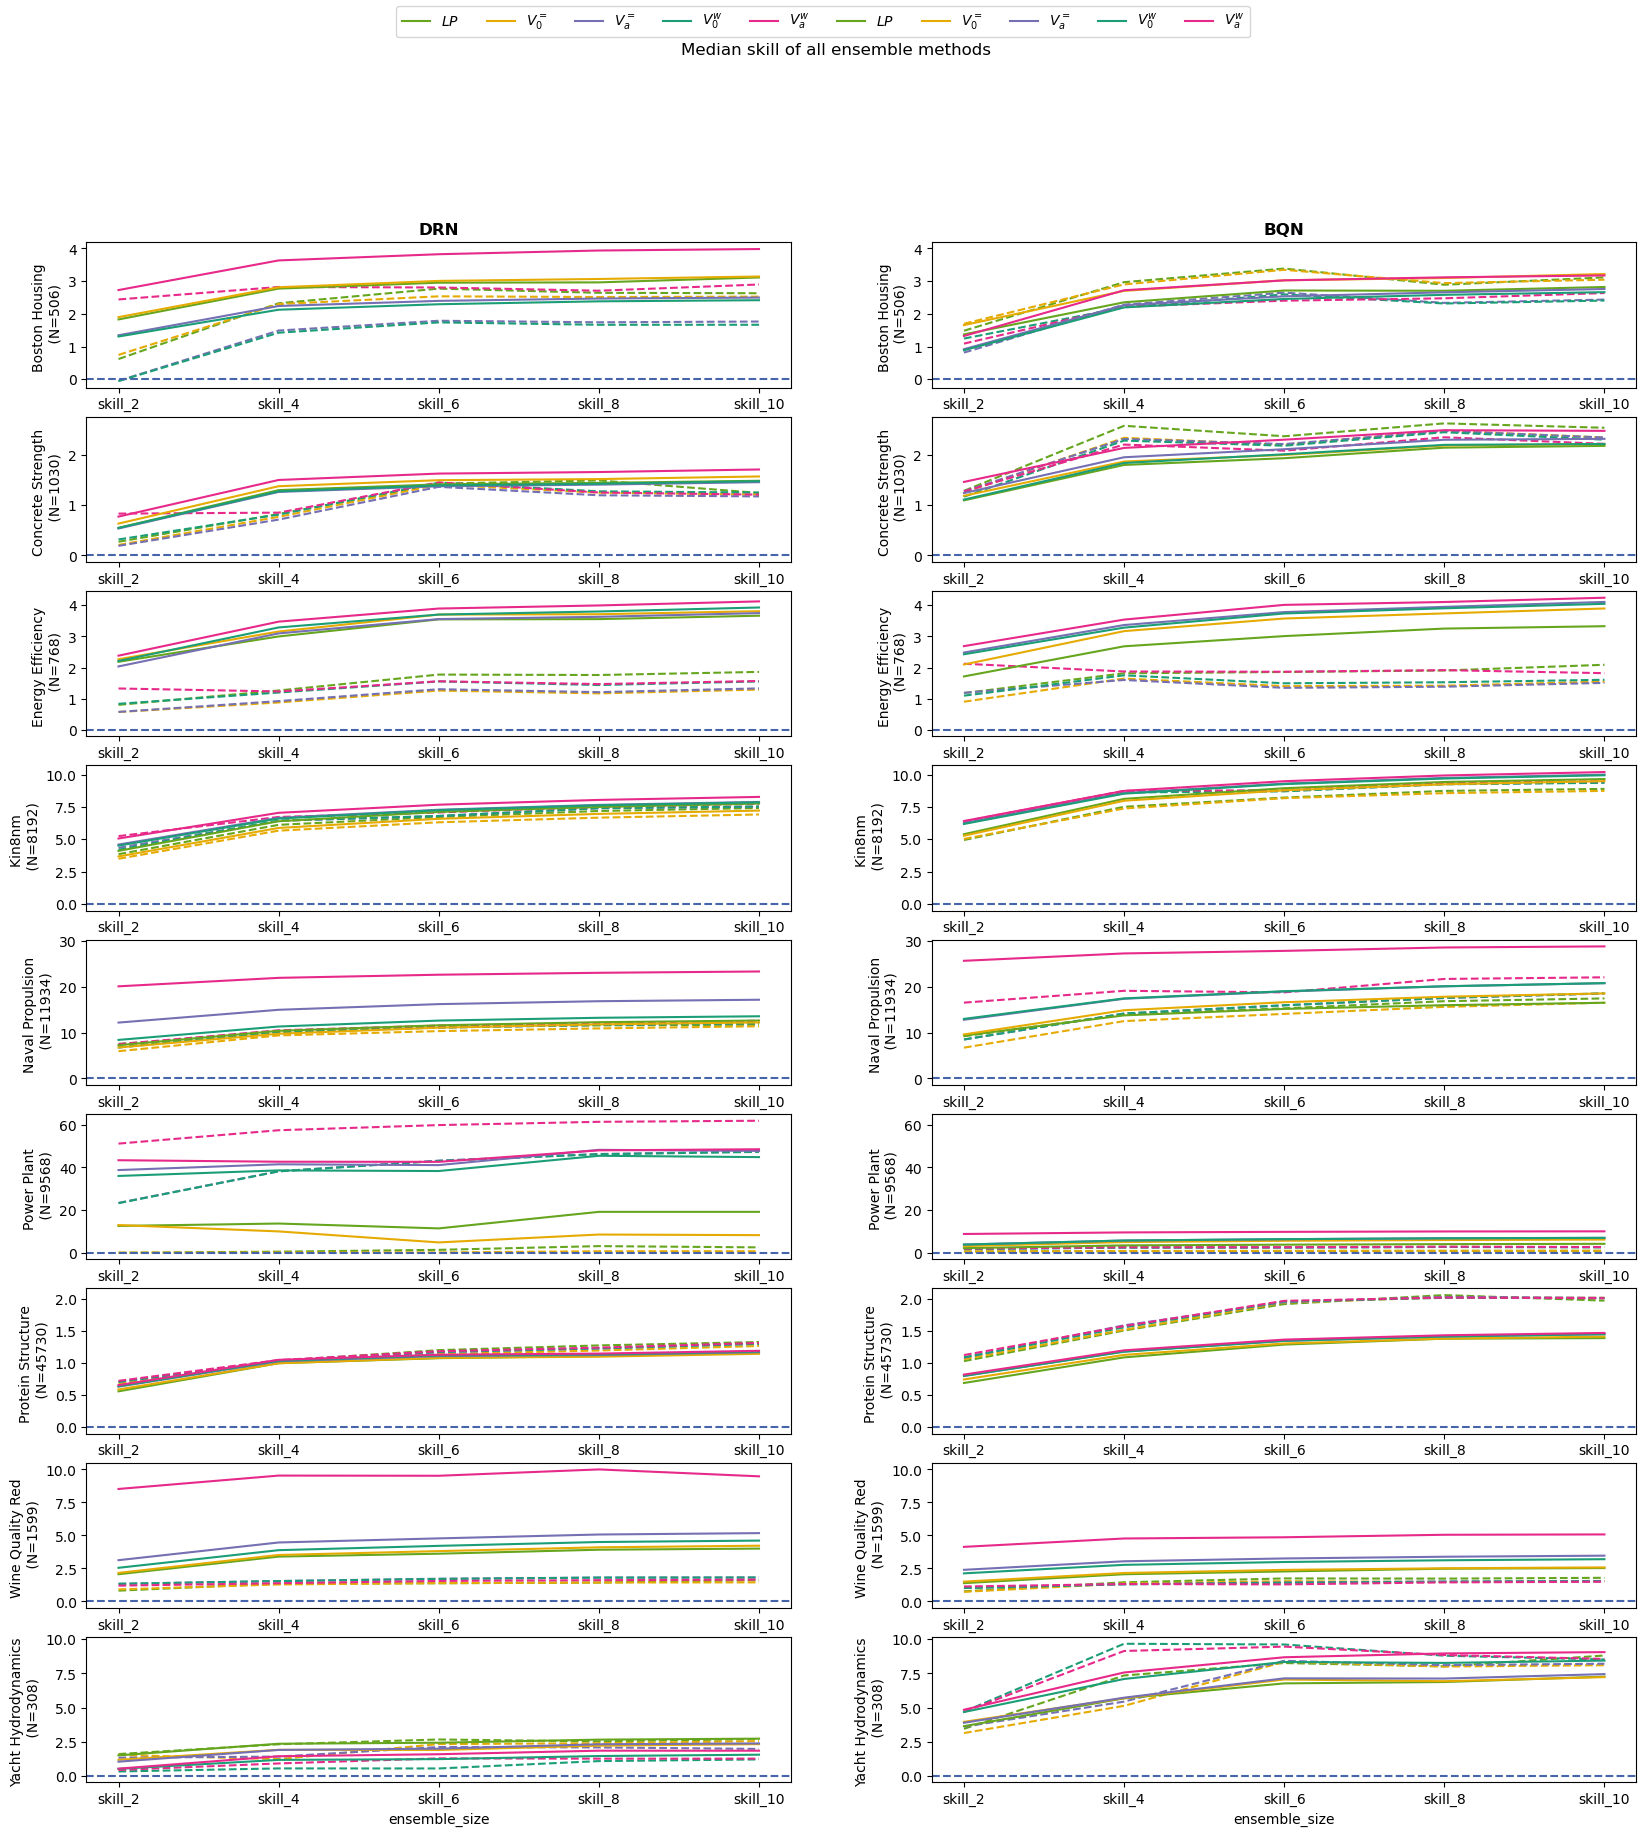

In [40]:
##### Skill - Lineplot - x=ensemble_size #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_skills[df_skills["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="skill")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"skill_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.lineplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="skill", x="ensemble_size", hue="agg", palette=agg_col, estimator="median", errorbar=errors, linestyle="dashed")
        g = sns.lineplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="skill", x="ensemble_size", hue="agg", palette=agg_col, estimator="mean", errorbar=errors, linestyle="solid")
        # Add 0 line
        g.axhline(0, linestyle="--", color=kit_cols_dict["blue"])
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])

# Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)
handles, labels = axs[0][0].get_legend_handles_labels()

# Set y axis range
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.suptitle(f"Median skill of all ensemble methods")
fig.legend(handles, [agg_labels.get(agg) for agg in labels], loc='upper center', ncol=len(labels))

# Save figure
# if export:
#     filename=os.path.join(save_dir, "01_skill_lineplot.pdf")
#     fig.savefig(filename, bbox_inches='tight')
#     filename=os.path.join(save_dir, "01_skill_lineplot.png")
#     fig.savefig(filename, bbox_inches='tight')

ValueError: Axis limits cannot be NaN or Inf

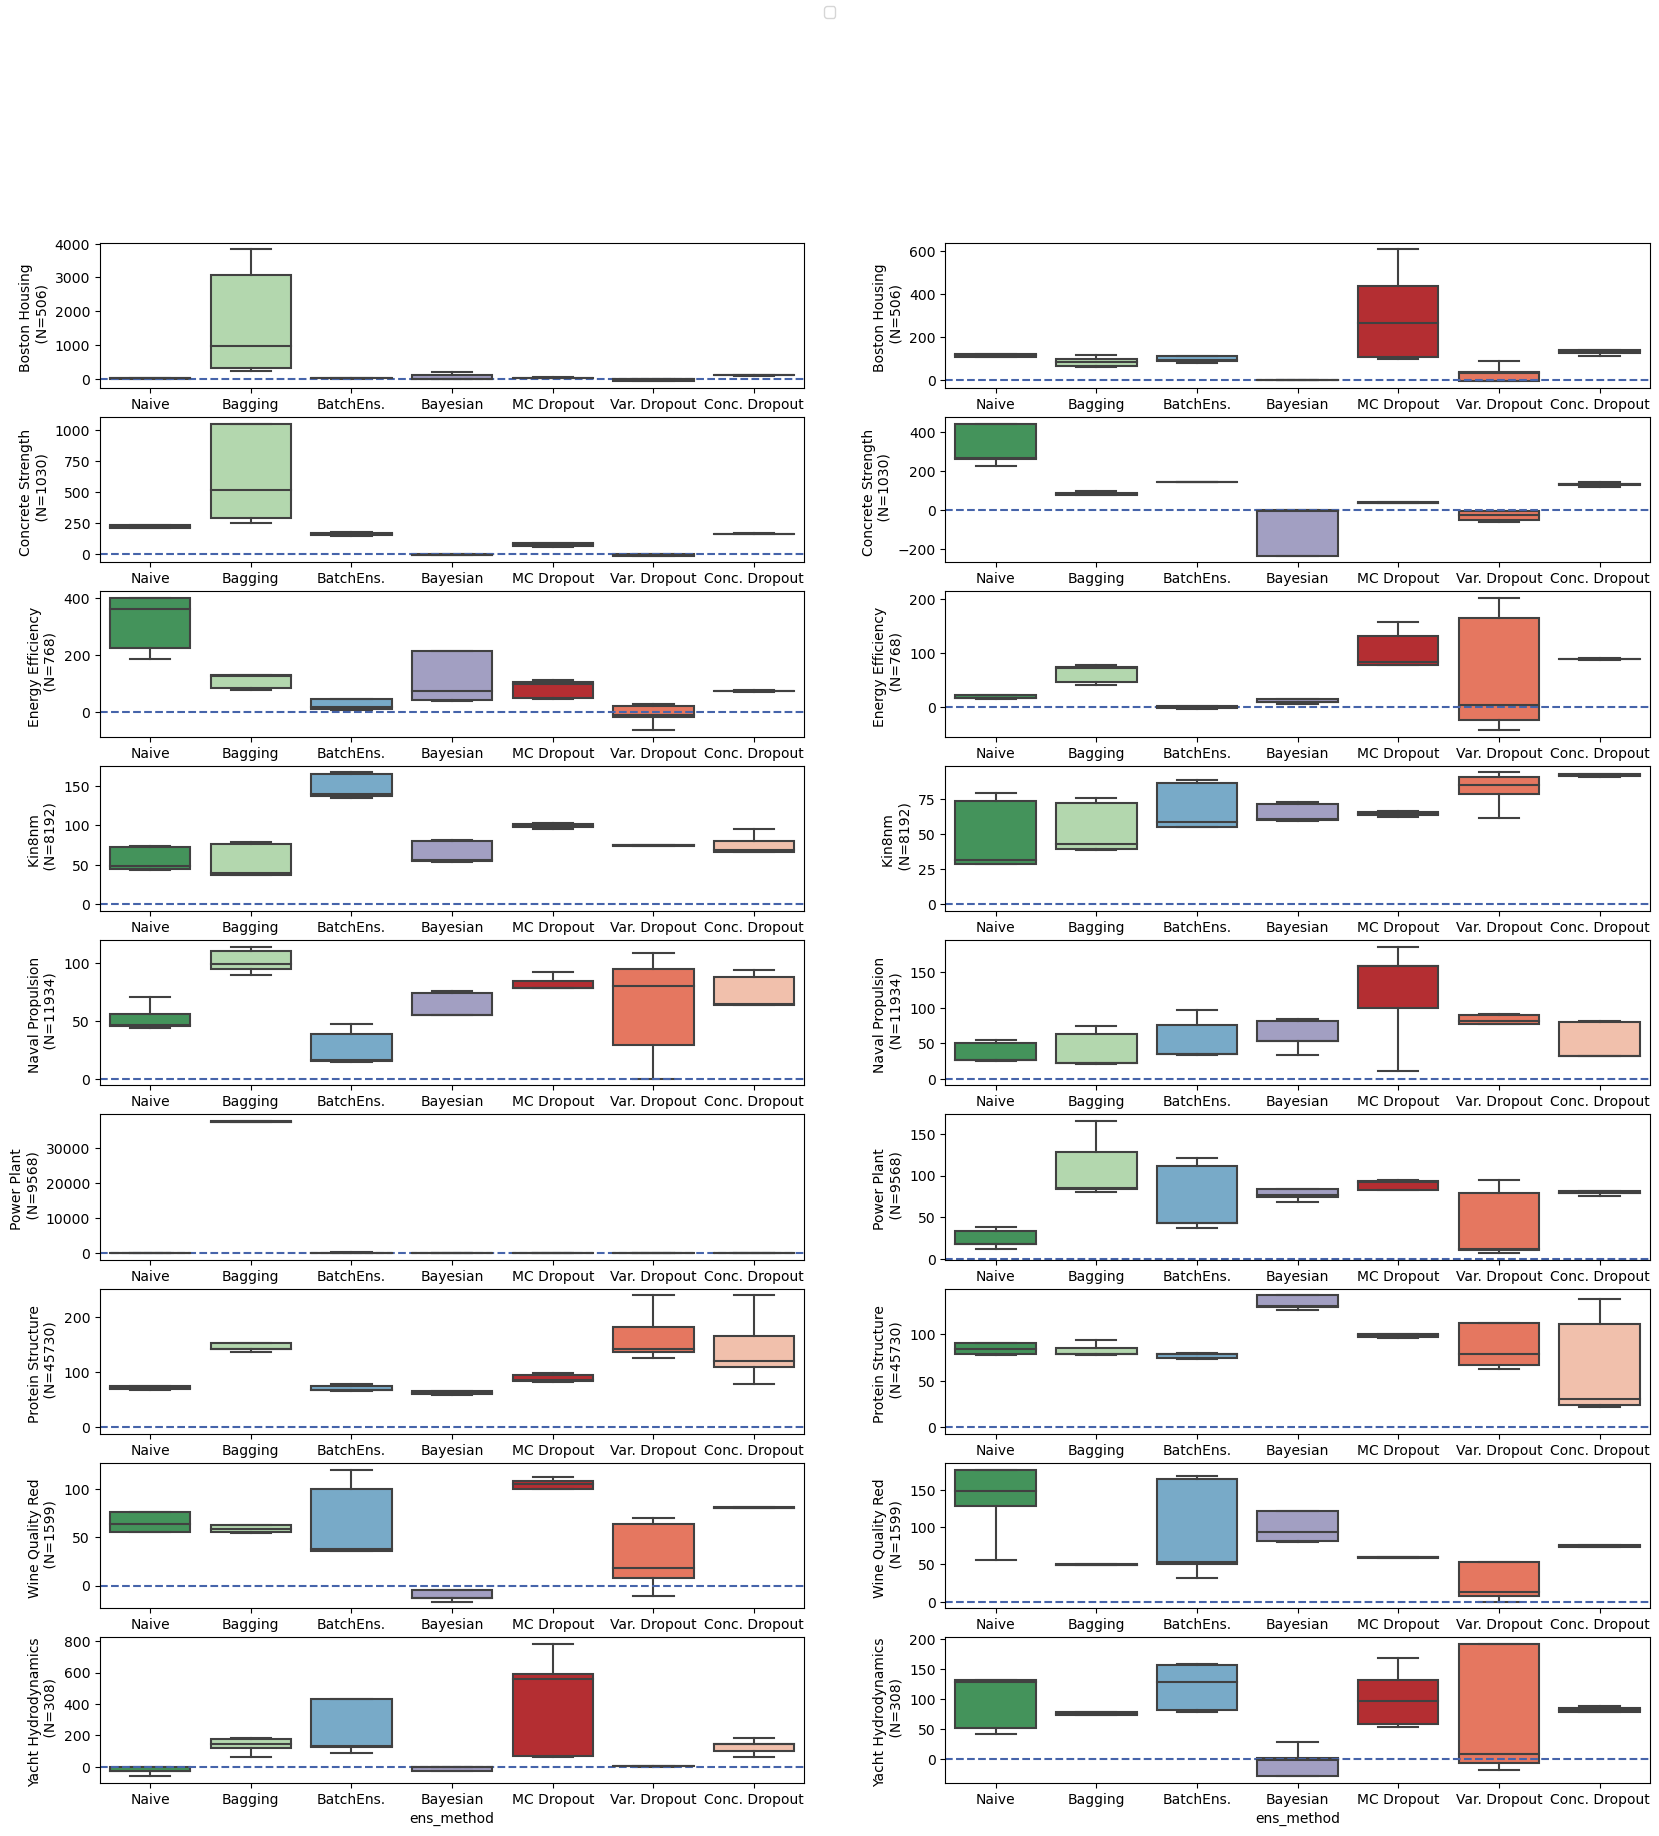

In [55]:
##### Skill - Boxplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_skills[df_skills["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        # df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="score")
        # Only use skills not differences
        # df_final = df_melt[df_melt["ensemble_size"].isin([f"score_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.boxplot(ax=axs[i_dataset][i_nn], data=df_nn_dataset,
                 y="change", x="ens_method", showfliers=show_outliers, palette=ens_col)#, hue="agg", palette=agg_col, edgecolor=kit_cols_dict["grey"])
        # g = sns.lineplot(ax=axs[i_dataset][i_nn], data=df_final,
        #          y="score", x="ensemble_size", hue="agg", palette=agg_col, estimator="mean", errorbar=errors, linestyle="solid")
        
        # Add 0 line
        g.axhline(0, linestyle="--", color=kit_cols_dict["blue"])
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])

# Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
fig.legend(handles, [agg_labels.get(agg) for agg in labels], loc='upper center', ncol=len(agg_meths))

# Set y axis range
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    hard_cut_l = np.inf # -500
    hard_cut_u = -np.inf # 500
    
    ax_drn.set_ylim(max(hard_cut_l, min(drn_l, bqn_l)), min(hard_cut_u, max(drn_u, bqn_u)))
    ax_bqn.set_ylim(max(hard_cut_l, min(drn_l, bqn_l)), min(hard_cut_u, max(drn_u, bqn_u)))
    
    # ax_drn.set_ylim(hard_cut_l, hard_cut_u)
    # ax_bqn.set_ylim(hard_cut_l, hard_cut_u)

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.suptitle(f"Relative change of skill_10 to skill_2")


# Save figure
if export:
    filename=os.path.join(save_dir, "01_skill_boxplot_change.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "01_skill_boxplot_change.png")
    fig.savefig(filename, bbox_inches='tight')

## Do same for scores

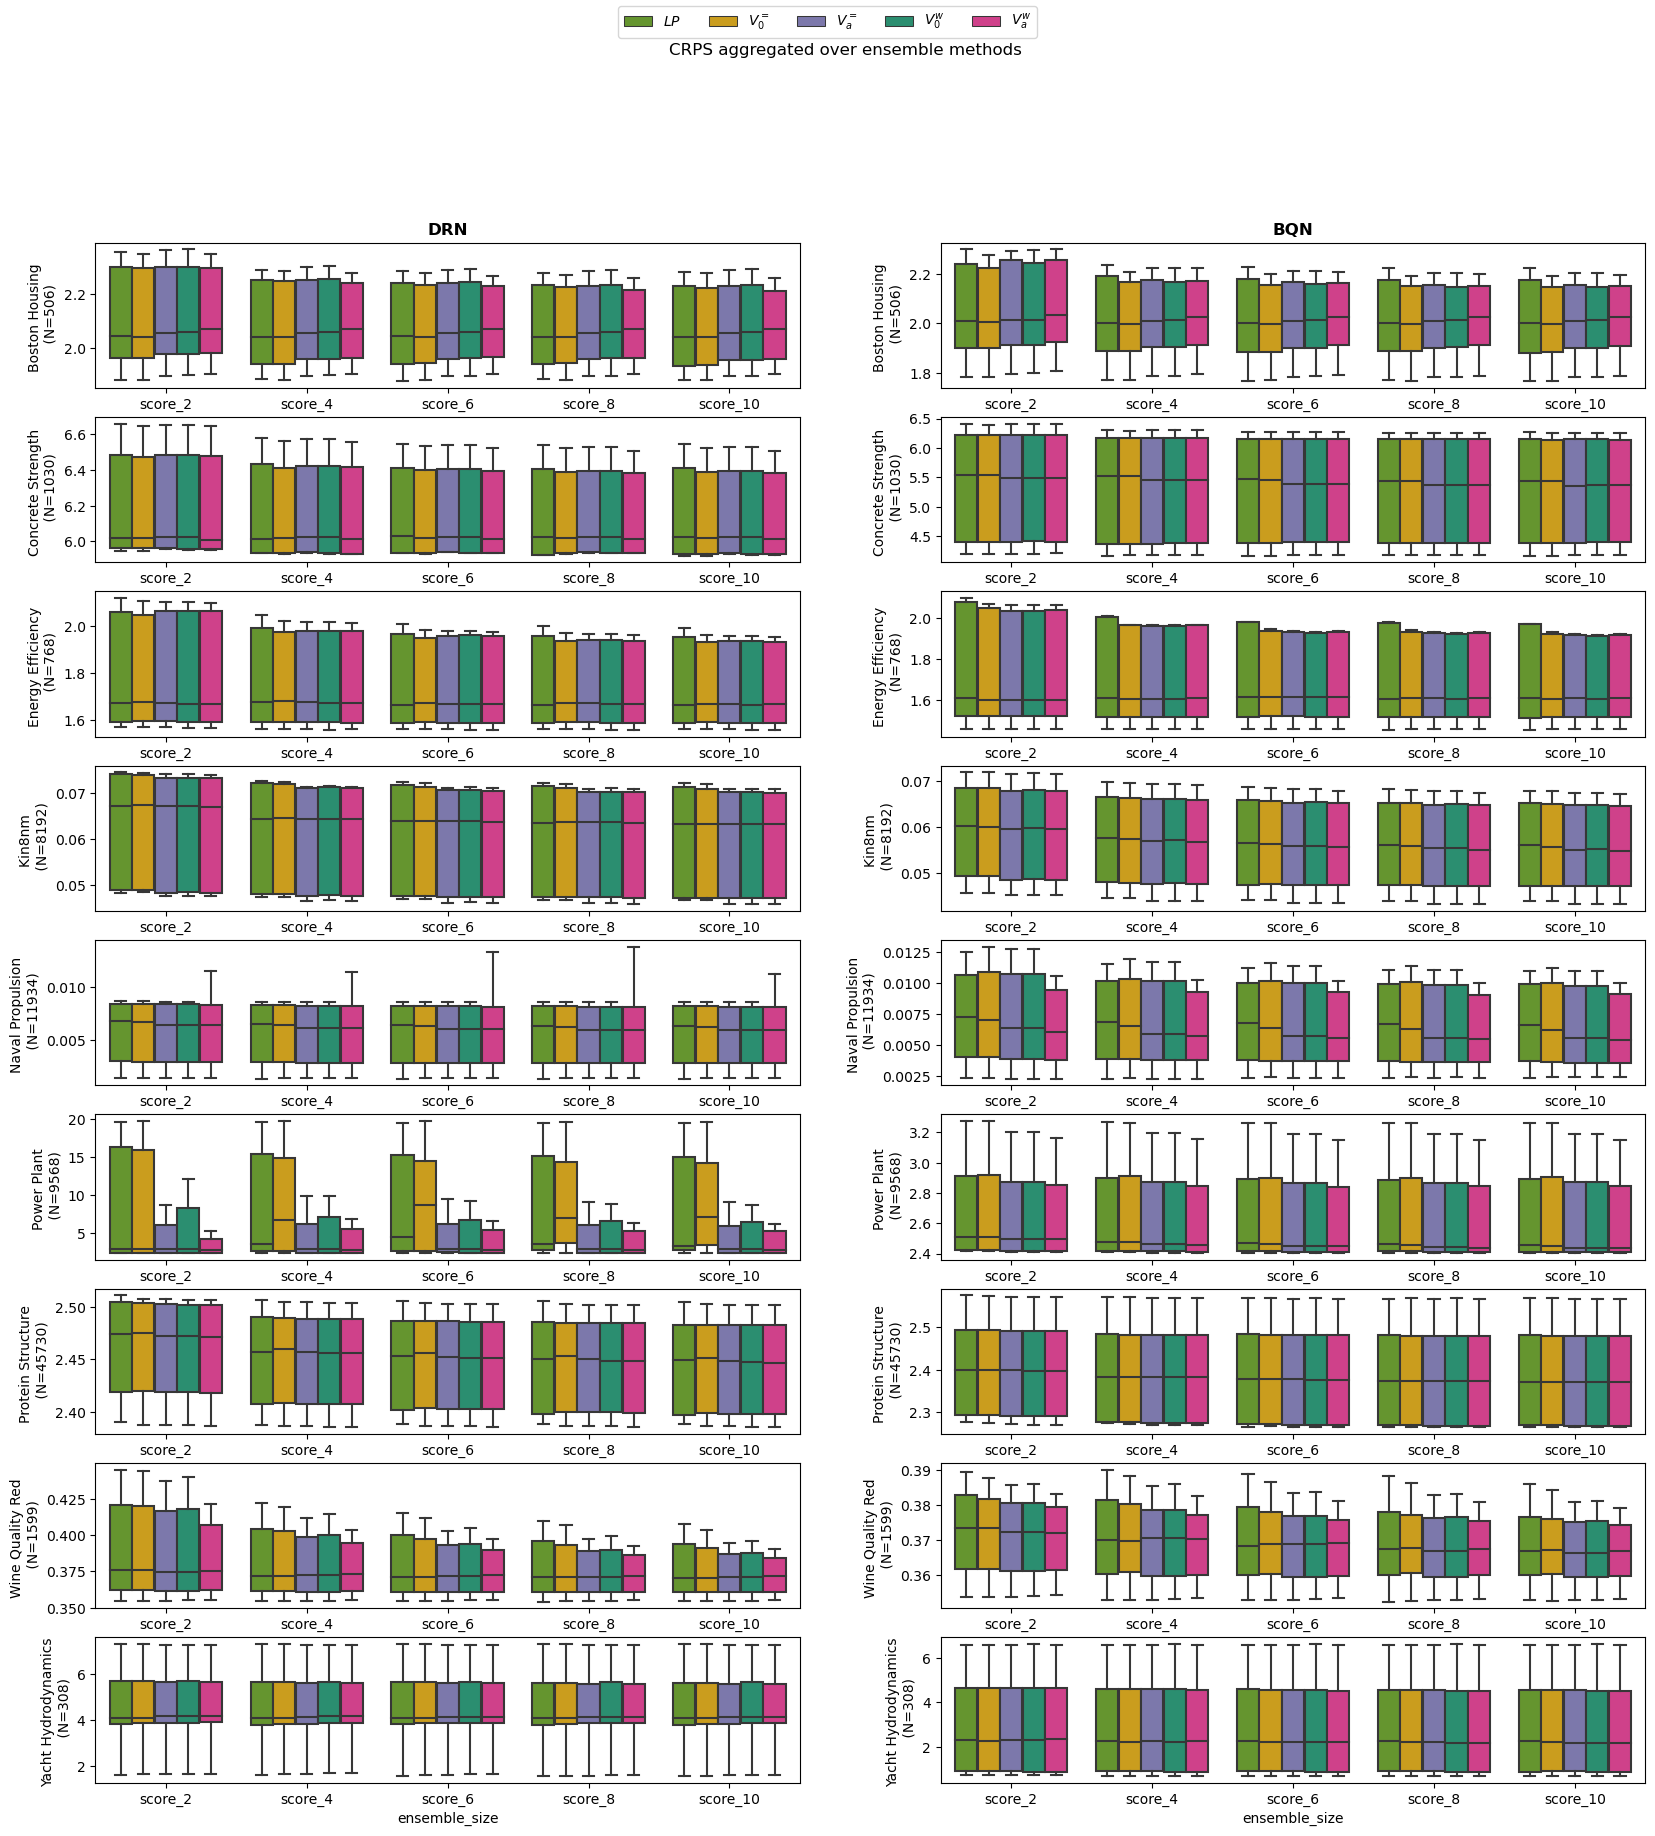

In [8]:
##### Score - Boxplots - x=ensemble_size #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_scores[df_scores["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="score")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"score_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.boxplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="score", x="ensemble_size", hue="agg", showfliers=False, palette=agg_col)
        
        # Add 0 line
        # g.axhline(0, linestyle="--", color=kit_cols_dict["blue"])
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])

# Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)
handles, labels = axs[0][0].get_legend_handles_labels()

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.suptitle(f"CRPS aggregated over ensemble methods")
fig.legend(handles, [agg_labels.get(agg) for agg in labels], loc='upper center', ncol=len(labels))

# Save figure
# if export:
#     filename=os.path.join(save_dir, "01_score_boxplot.pdf")
#     fig.savefig(filename, bbox_inches='tight')
#     filename=os.path.join(save_dir, "01_score_boxplot.png")
#     fig.savefig(filename, bbox_inches='tight')

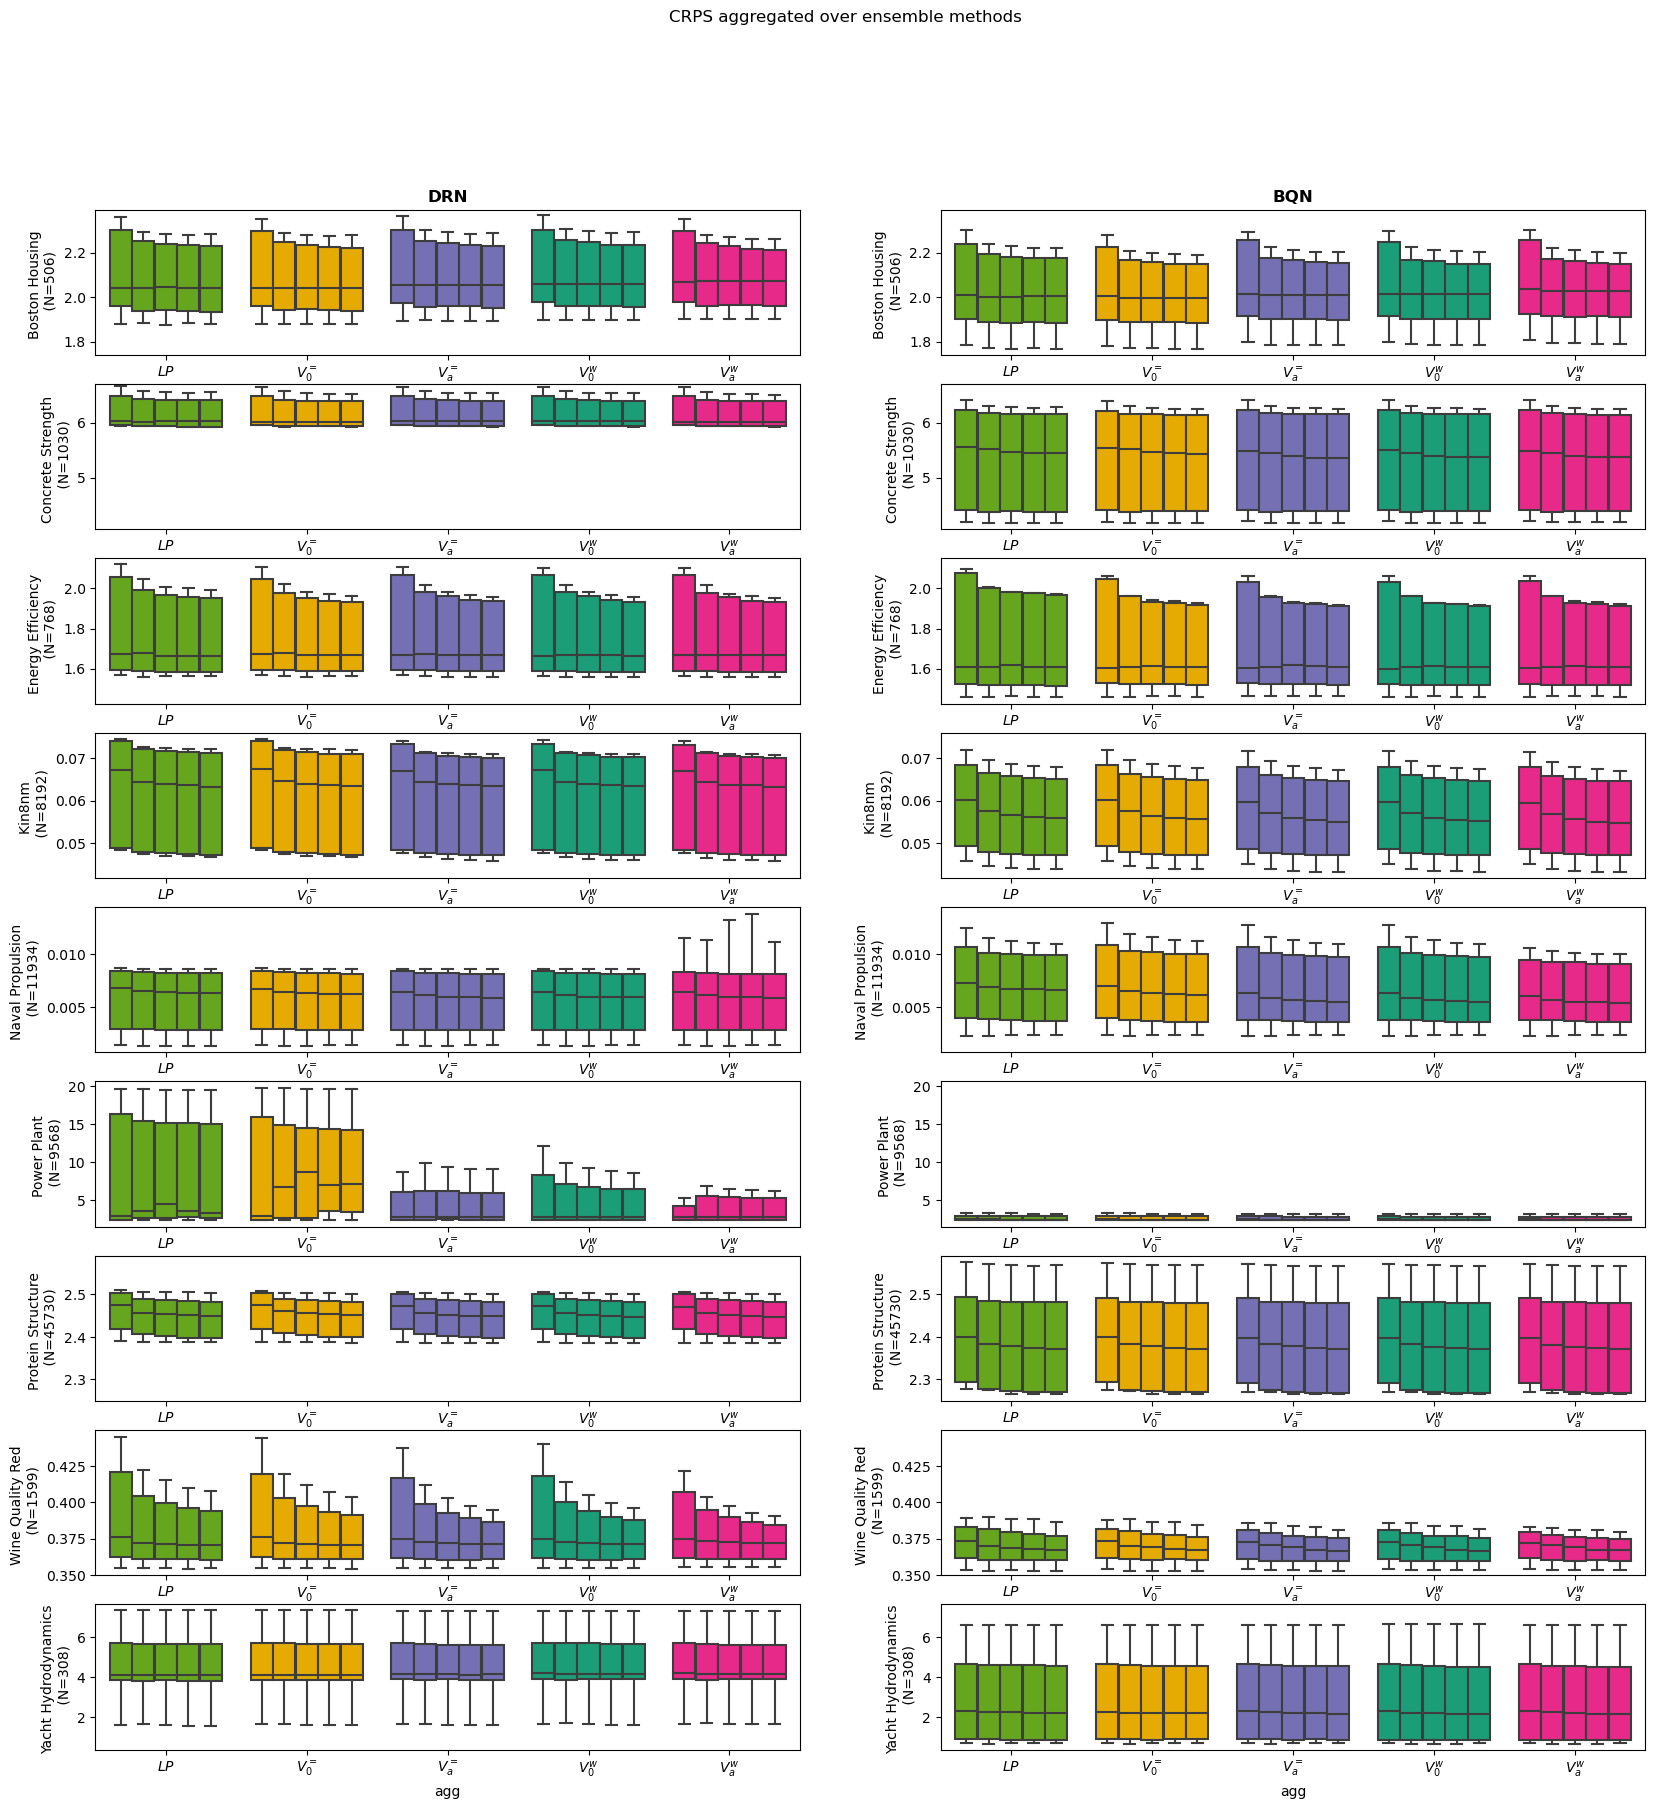

In [9]:
##### Score - Boxplots - x=aggregation_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_scores[df_scores["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="score")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"score_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.boxplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="score", x="agg", hue="ensemble_size", showfliers=show_outliers)
        
        # Add 0 line
        # g.axhline(0, linestyle="--", color=kit_cols_dict["blue"])
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([agg_labels.get(agg) for agg in agg_meths])

        # Change color
        boxplots = axs[i_dataset][i_nn].patches
        agg_col_ls = list(agg_col.values())[:5]
        for i, boxplot in enumerate(boxplots[1:len(agg_col_ls)*2:2] + boxplots[len(agg_col_ls)*2:]):  # type: ignore
            boxplot.set_facecolor(agg_col_ls[i//5])

# # Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)
handles, labels = axs[0][0].get_legend_handles_labels()

# Set y axis range
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.suptitle(f"CRPS aggregated over ensemble methods")

# Save figure
# if export:
#     if show_outliers:
#         filename=os.path.join(save_dir, "01_score_boxplot_per_agg.pdf")
#         fig.savefig(filename, bbox_inches='tight')
#         filename=os.path.join(save_dir, "01_score_boxplot_per_agg.png")
#         fig.savefig(filename, bbox_inches='tight')
#     else:
#         filename=os.path.join(save_dir, "01_score_boxplot_per_agg_no_outliers.pdf")
#         fig.savefig(filename, bbox_inches='tight')
#         filename=os.path.join(save_dir, "01_score_boxplot_per_agg_no_outliers.png")
#         fig.savefig(filename, bbox_inches='tight')

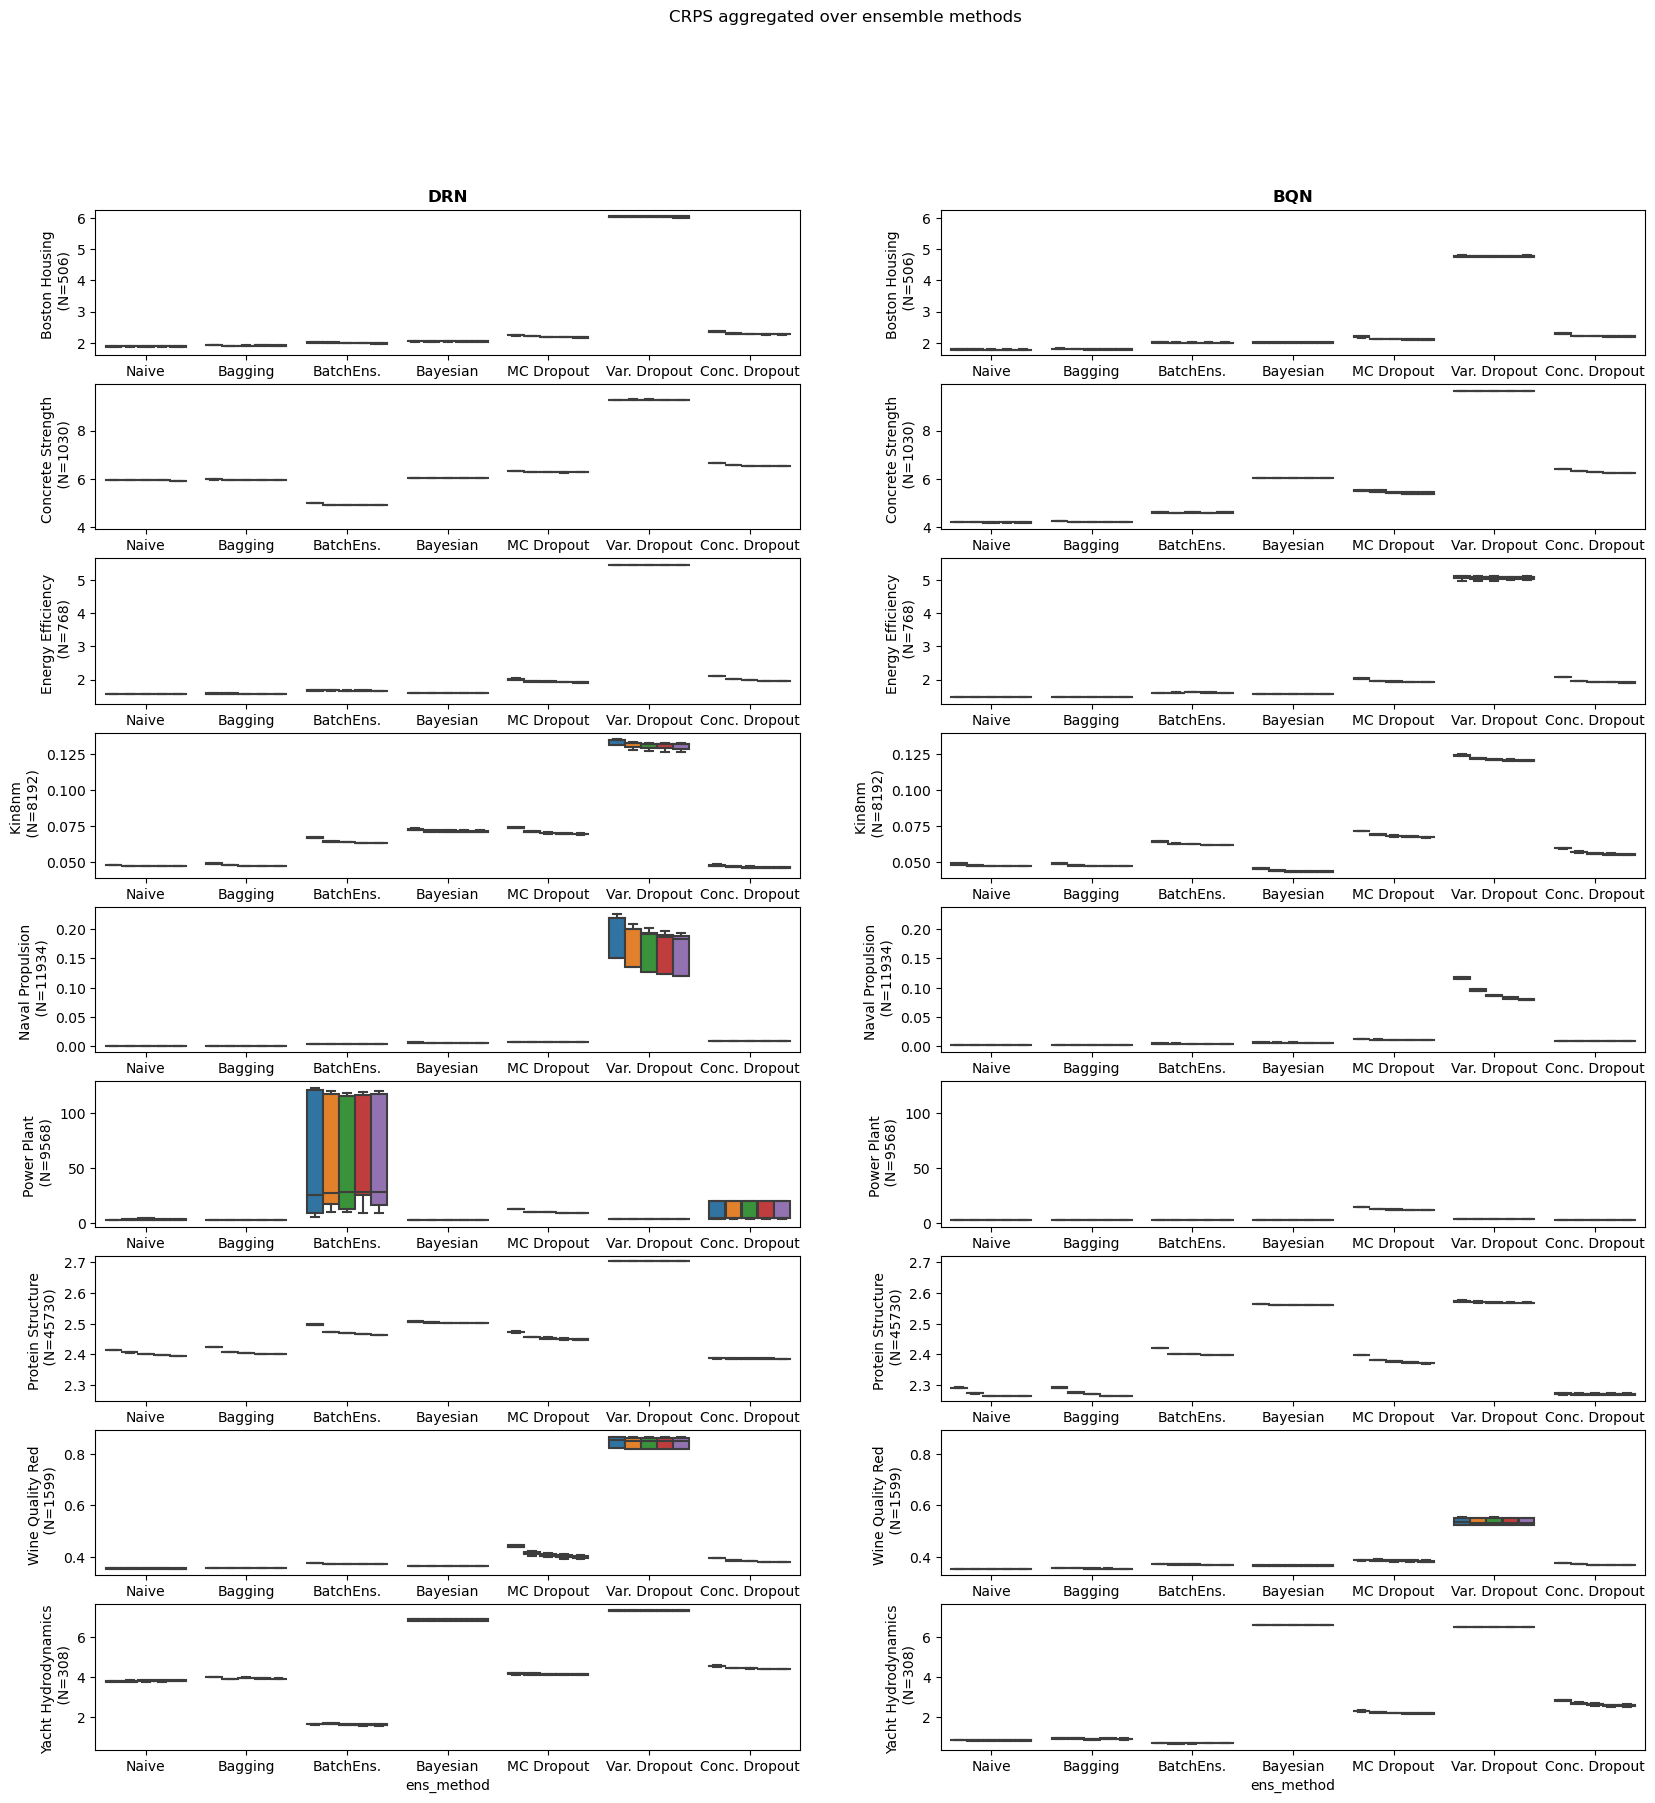

In [11]:
##### Score - Boxplots - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_scores[df_scores["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="score")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"score_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.boxplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="score", x="ens_method", hue="ensemble_size", showfliers=show_outliers)
        
        # Add 0 line
        # g.axhline(0, linestyle="--", color=kit_cols_dict["blue"])
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(ens) for ens in ens_method_ls])

        # Change color
        boxplots = axs[i_dataset][i_nn].patches
        # agg_col_ls = list(agg_col.values())[:5]
        # for i, boxplot in enumerate(boxplots[1:len(agg_col_ls)*2:2] + boxplots[len(agg_col_ls)*2:]):  # type: ignore
        #     boxplot.set_facecolor(agg_col_ls[i//len(agg_col_ls)])

# # Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)
handles, labels = axs[0][0].get_legend_handles_labels()

# Set y axis range
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.suptitle(f"CRPS aggregated over ensemble methods")

# Save figure
# if export:
#     if show_outliers:
#         filename=os.path.join(save_dir, "01_skill_boxplot_per_agg.pdf")
#         fig.savefig(filename, bbox_inches='tight')
#         filename=os.path.join(save_dir, "01_skill_boxplot_per_agg.png")
#         fig.savefig(filename, bbox_inches='tight')
#     else:
#         filename=os.path.join(save_dir, "01_skill_boxplot_per_agg_no_outliers.pdf")
#         fig.savefig(filename, bbox_inches='tight')
#         filename=os.path.join(save_dir, "01_skill_boxplot_per_agg_no_outliers.png")
#         fig.savefig(filename, bbox_inches='tight')

In [94]:
# Define filters
agg_method_to_plot = "vi"
top_k = 5
top_k_score = "score_10"

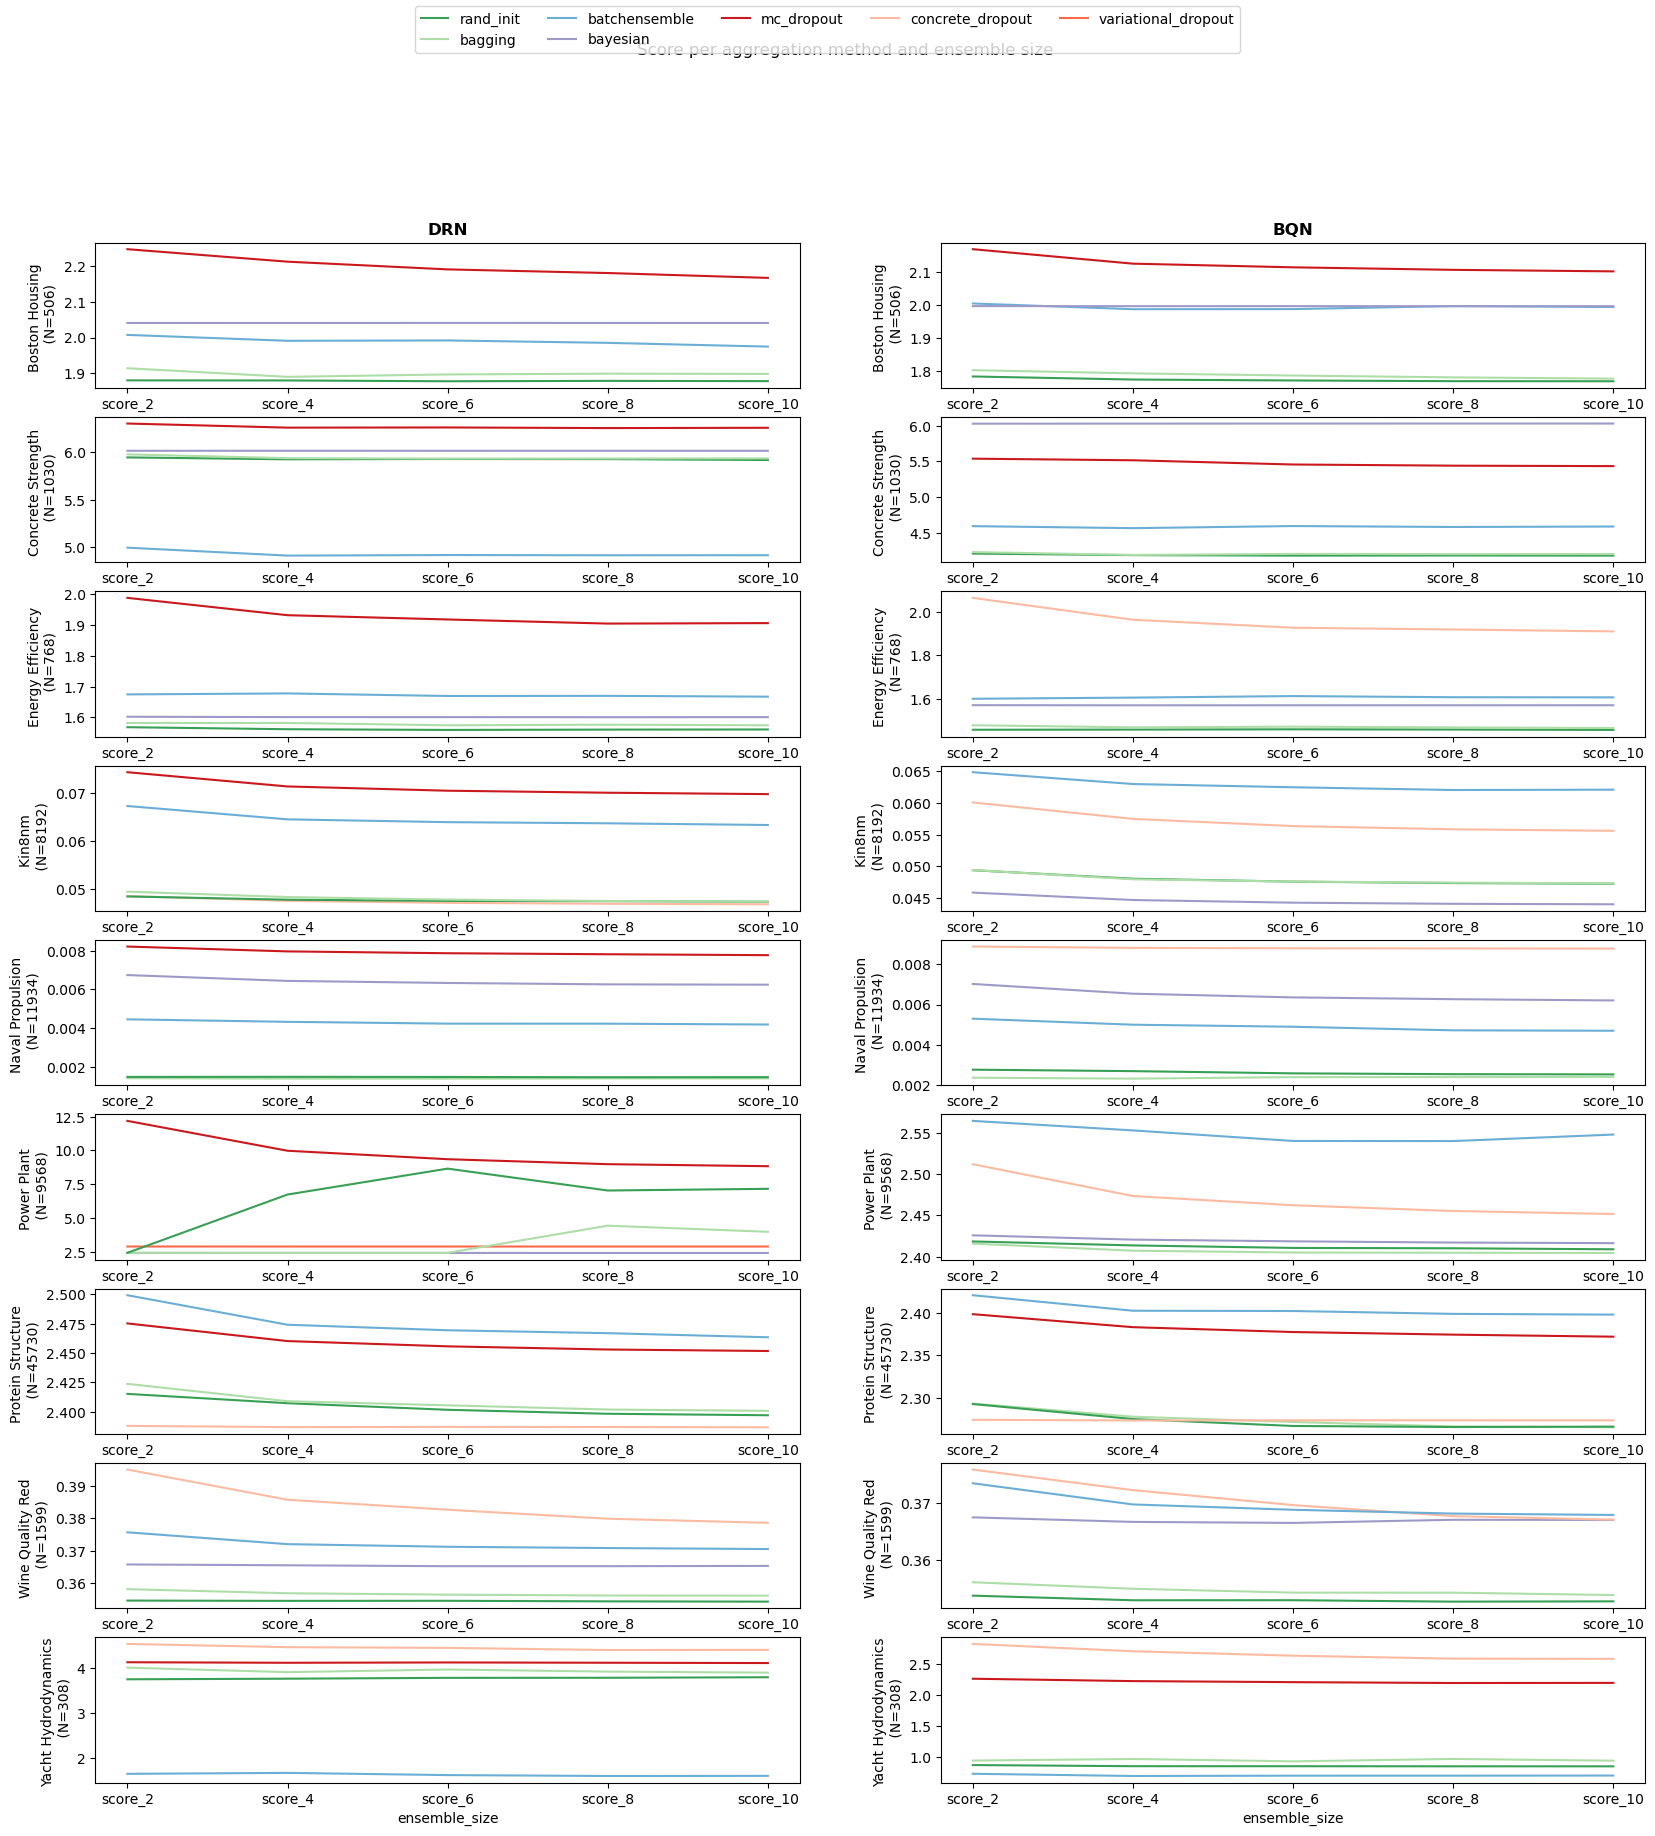

In [95]:
##### Score - Lineplot - x=ensemble_size #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Filter for specific aggregation method
df_agg = df_scores[df_scores["agg"] == agg_method_to_plot]
# Sort and select best k results
df_agg_top = df_agg.sort_values(["dataset", "nn", top_k_score], ascending=True).groupby(["dataset", "nn"]).head(top_k)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_agg_top[df_agg_top["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="score")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"score_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.lineplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="score", x="ensemble_size", hue="ens_method", palette=ens_col, estimator=None, errorbar=errors)
        # g = sns.lineplot(ax=axs[i_dataset][i_nn], data=df_final,
        #          y="score", x="ensemble_size", hue="agg", palette=agg_col, estimator="mean", errorbar=errors, linestyle="solid")
        
        # Add 0 line
        # g.axhline(0, linestyle="--", color=kit_cols_dict["blue"])
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])

# Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
fig.legend(handles, labels, loc='upper center', ncol=len(agg_meths))

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.suptitle(f"Score per aggregation method and ensemble size")


# Save figure
# if export:
#     filename=os.path.join(save_dir, "01_score_lineplot.pdf")
#     fig.savefig(filename, bbox_inches='tight')
#     filename=os.path.join(save_dir, "01_score_lineplot.png")
#     fig.savefig(filename, bbox_inches='tight')

In [13]:
df_scores["change"] = (df_scores["score_10"] - df_scores["score_2"]) / df_scores["score_2"] * 100
df_scores

ens_method dataset   nn    agg   score_2   score_4   score_6  \
0           rand_init  boston  drn     lp  1.880196  1.882215  1.874762   
1           rand_init  boston  drn     vi  1.880447  1.880195  1.877956   
2           rand_init  boston  drn   vi-a  1.894677  1.895243  1.893030   
3           rand_init  boston  drn   vi-w  1.896980  1.897274  1.895165   
4           rand_init  boston  drn  vi-aw  1.901667  1.902644  1.901496   
..                ...     ...  ...    ...       ...       ...       ...   
625  concrete_dropout   yacht  bqn     lp  2.838856  2.746799  2.693349   
626  concrete_dropout   yacht  bqn     vi  2.832418  2.713294  2.641648   
627  concrete_dropout   yacht  bqn   vi-a  2.843921  2.724507  2.648134   
628  concrete_dropout   yacht  bqn   vi-w  2.822318  2.674681  2.612777   
629  concrete_dropout   yacht  bqn  vi-aw  2.811190  2.638940  2.578053   

      score_8  score_10  avg_score     change  
0    1.884769  1.880862   1.880561   0.035460  
1    1.879042  1.878322   1.879192  -0.113019  
2    1.893910  1.893242   1.894020  -0.075741  
3    1.896109  1.895413   1.896188  -0.082642  
4    1.902405  1.901480   1.901939  -0.009813  
..        ...       ...        ...        ...  
625  2.674734  2.646699   2.720087  -6.768828  
626  2.593826  2.590692   2.674375  -8.534262  
627  2.601326  2.600102   2.683598  -8.573335  
628  2.556476  2.554257   2.644102  -9.497896  
629  2.516266  2.519275   2.612744 -10.384041  

[630 rows x 11 columns]

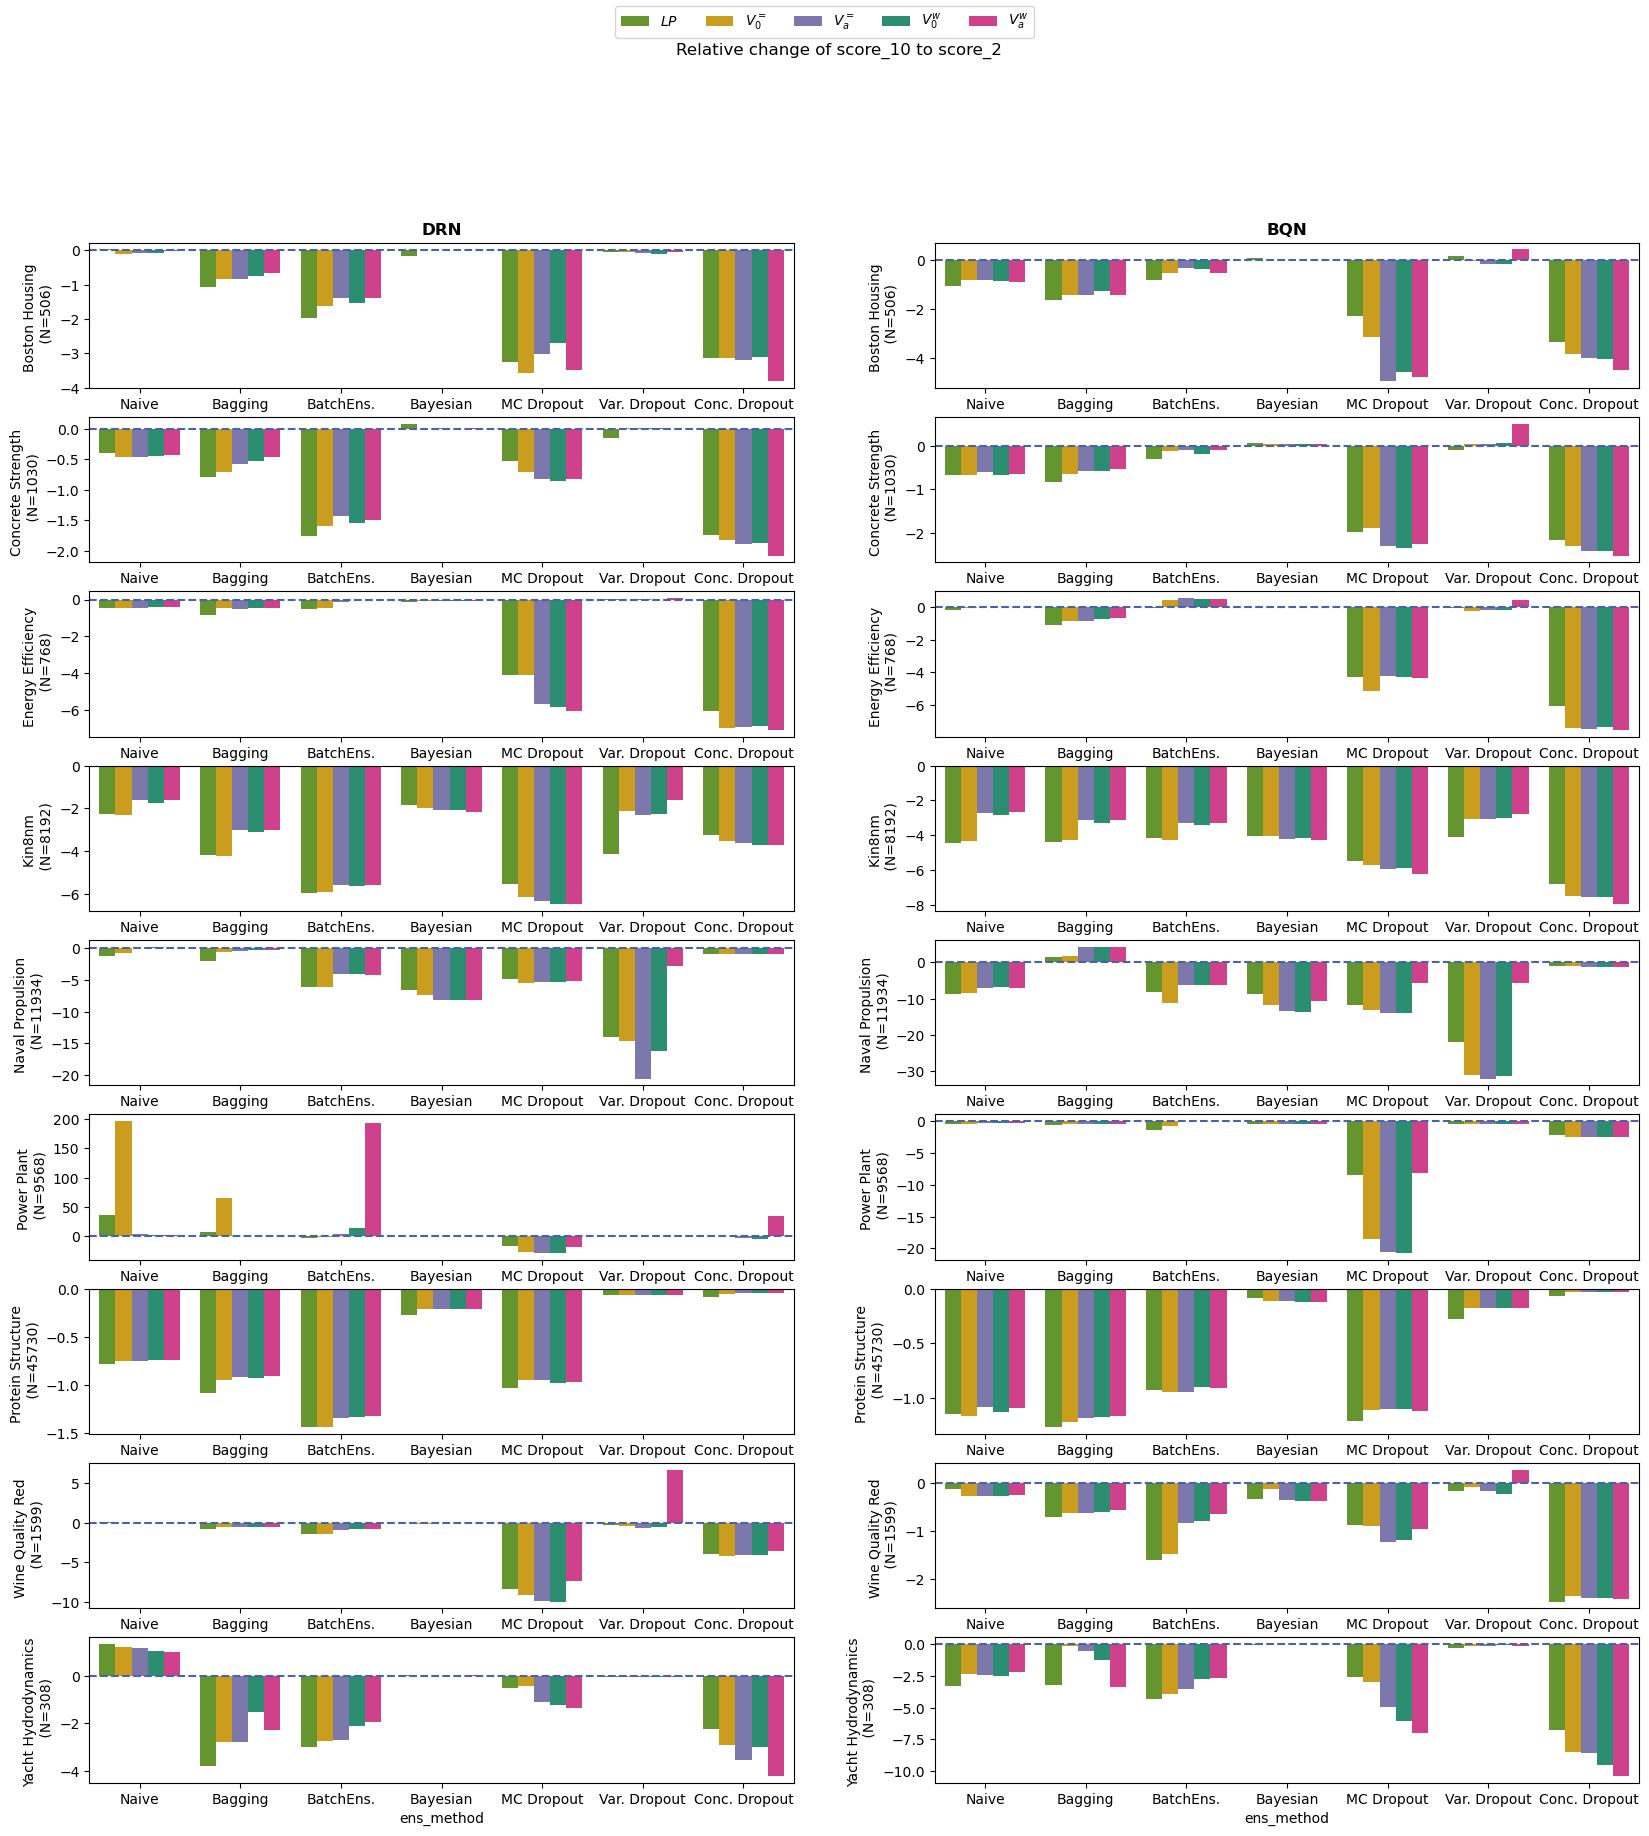

In [16]:
##### Score - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_scores[df_scores["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        # df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="score")
        # Only use skills not differences
        # df_final = df_melt[df_melt["ensemble_size"].isin([f"score_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.barplot(ax=axs[i_dataset][i_nn], data=df_nn_dataset,
                 y="change", x="ens_method", hue="agg", palette=agg_col)
        # g = sns.lineplot(ax=axs[i_dataset][i_nn], data=df_final,
        #          y="score", x="ensemble_size", hue="agg", palette=agg_col, estimator="mean", errorbar=errors, linestyle="solid")
        
        # Add 0 line
        g.axhline(0, linestyle="--", color=kit_cols_dict["blue"])
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])

# Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
fig.legend(handles, [agg_labels.get(agg) for agg in labels], loc='upper center', ncol=len(agg_meths))

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.suptitle(f"Relative change of score_10 to score_2")


# Save figure
# if export:
#     filename=os.path.join(save_dir, "01_score_barplot_change.pdf")
#     fig.savefig(filename, bbox_inches='tight')
#     filename=os.path.join(save_dir, "01_score_barplot_change.png")
#     fig.savefig(filename, bbox_inches='tight')